## Lab3 Part 2

Lab3 is splitted into two parts as it is gettign really long.
## Task 5.1 Dynamic Programming
The goal of this second half of the lab is to investigate dynamic progamming along scanlines in stereo vision.  In this part of the practical, we build a basic dynamic programming algorithm, which will solve the same problem as presented in the notes.  

In Task5 we will apply this to the stereo problem.  

Use the template below, filling in parts marked "TO DO" (only todo for Task 5.1 one is in functions.py).



In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from functions import dynamicProgram
plt.close('all')

In [2]:
# define unary costs : unaryCosts[d,j] represents the cost for having
# disparity d at pixel j.
unaryCosts = np.array([[2.0, 1.1, 5.7, 1.5, 6.0, 3.1],
              [0.8, 4.8, 1.0, 3.0, 6.9, 3.3],
              [4.3, 2.3, 2.4, 2.4, 6.6, 6.2],
              [6.4, 0.0, 6.1, 0.8, 7.1, 2.1],
              [2.3, 2.2, 4.9, 8.9, 1.0, 9.8]])

# define pairwise costs:  pairwiseCosts[a,b] represents the cost for changing from 
# disparity level A at pixel j to disparity level B at pixel j+1;
pairwiseCosts = np.array([[   0,   2, 100, 100, 100],
                          [   2,   0,   2, 100, 100],
                          [ 100,   2,   0,   2, 100],
                          [ 100, 100,   2,   0,   2],
                          [ 100, 100, 100,   2,   0]])



In [3]:
# TODO Fill in the dynamicProgram function in "functions.py"

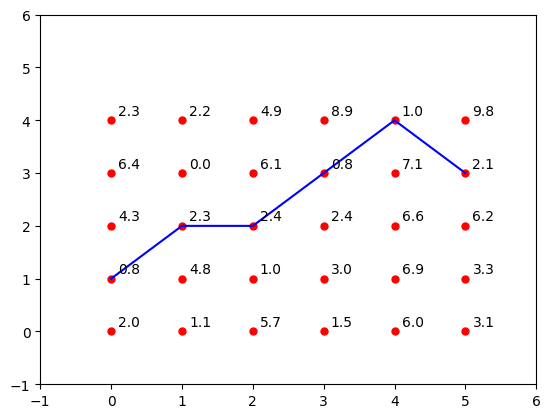

Path Cost = 27.8


In [3]:

# Now, use dynamic programming to find best solution.
bestPath = dynamicProgram(unaryCosts,pairwiseCosts)

# display the nodes
nY = len(unaryCosts)
nX = len(unaryCosts[0])
plt.axis([-1, 6, -1, 6])
for cY in range(nY):
    for cX in range(nX):
        plt.plot(cX,cY,'ro',ms=5.)
        plt.text(cX+.1, cY+.1, unaryCosts[cY,cX])


# display the best path
plt.plot(range(nX),bestPath,'b-')
plt.show()

# calculate the cost of the path computed
bestPathCostUnary = np.sum((np.transpose(unaryCosts).reshape((nX*nY,1)))[(np.add(nY * np.array(range(nX)),np.transpose(bestPath)[0])).astype(int)])
bestPathCostPairwise = np.sum(np.transpose(pairwiseCosts).reshape((nY*nY,1))[np.array([bestPath[0:-1]+nY*bestPath[1:]]).reshape((1,nY)).astype(int)[0]])
bestCost = bestPathCostUnary+bestPathCostPairwise
print('Path Cost =',bestCost)

## Task 5.2 Dynamic Programming for stereo depth estimation


The goal of this part of the practical is to use the dynamic programming routine that you developed in the first part to solve the dense stero problem.

Use the template below, filling in parts marked "TO DO".

### Extra Tasks:
Task hint: Crop or downsample your image if your stereo is slow

Task1: Capture or find two image pairs: one with good stereo depth and one with bad stereo depth. Note that you should only the two camera have a known, and there should be no moving objects in the scene.

Task2: Measure your baseline distance between the camera with a ruler, does the depth esimation match the real distance？

Task3: (Unmarked Optional) Can you use two cameras at the same time for stereo capture?

In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from functions import dynamicProgram, dynamicProgramVec
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# load in images and ground truth
data = loadmat('../dataset/StereoData.mat')
im1 = data['im1'].astype('int')
im2 = data['im2'].astype('int')
gt = data['gt'].astype('int')

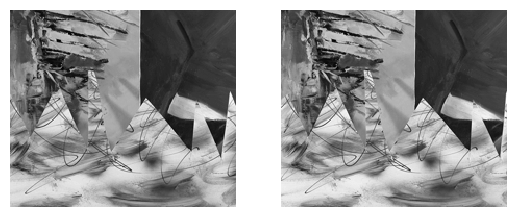

In [12]:
# ground truth disparity is originally expressed in 16'ths of pixels but we 
# will only consider whole-pixel shifts
gtDisp = np.round(gt.astype(float)/16)

im1show = im1
im2show = im2
if np.max(im1) > 1:
    im1show = im1.astype(float)/255.
    im2show = im2.astype(float)/255.
    
# display image
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im1, cmap='gray', interpolation='nearest', aspect=1)
ax1.axis('off')
ax2.imshow(im2, cmap='gray', interpolation='nearest', aspect=1)
ax2.axis('off')
plt.show()

### Complete the TODOs in the final cell below

Here we are going to make use of the "dynamicProgram" function we just wrote.

We will first calculate the unary costs before using our function to calculate estimated disparity.

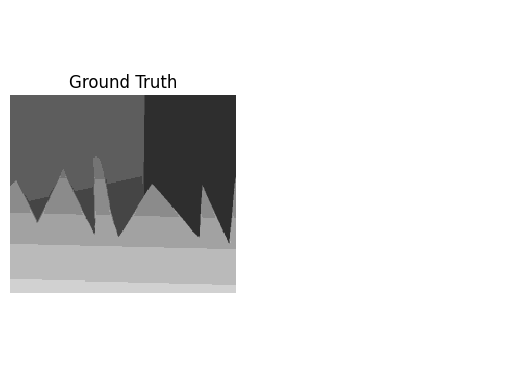

Processing scanline 0


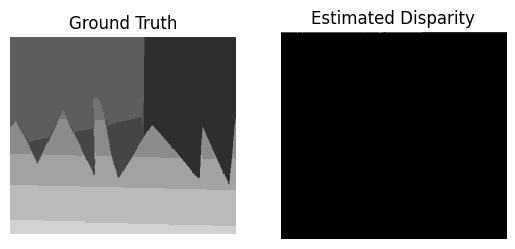

Processing scanline 1


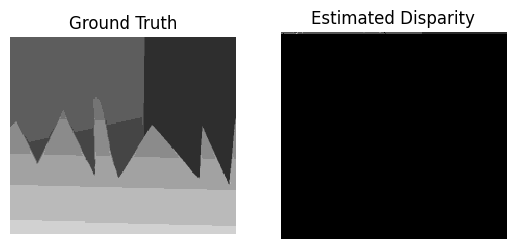

Processing scanline 2


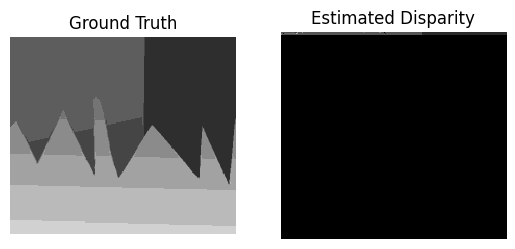

Processing scanline 3


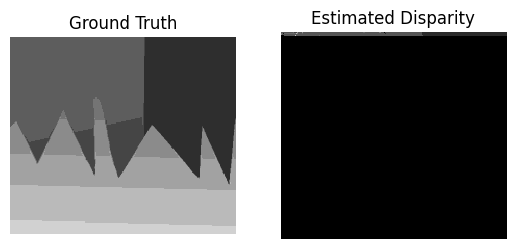

Processing scanline 4


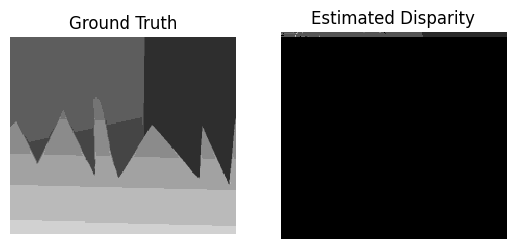

Processing scanline 5


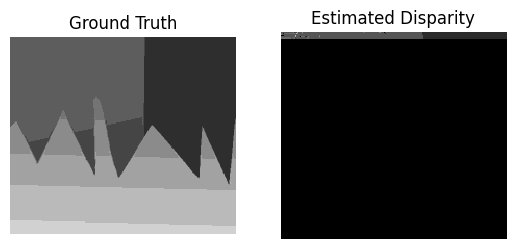

Processing scanline 6


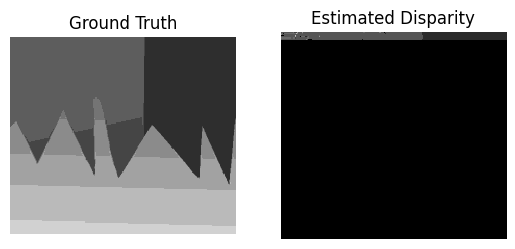

Processing scanline 7


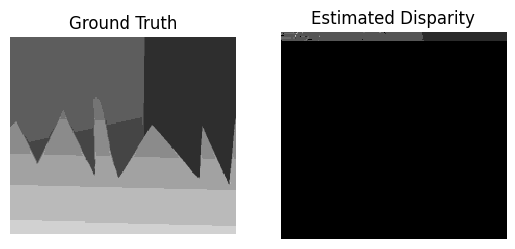

Processing scanline 8


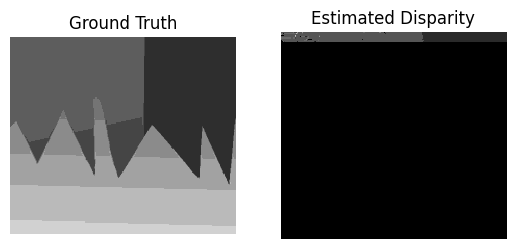

Processing scanline 9


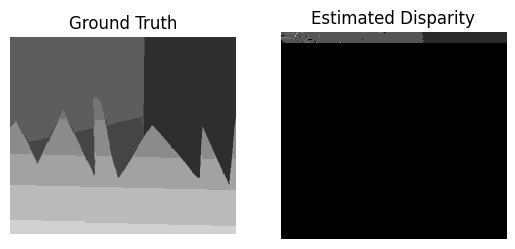

Processing scanline 10


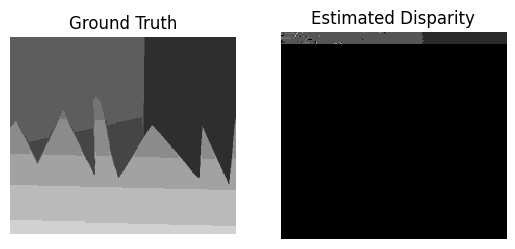

Processing scanline 11


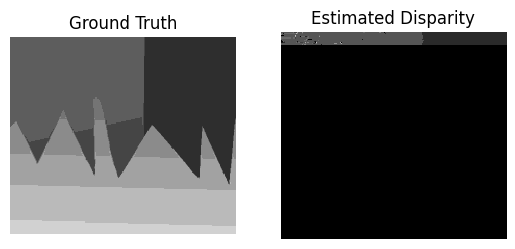

Processing scanline 12


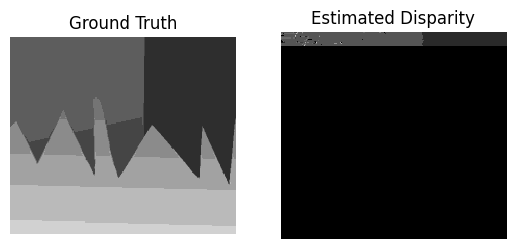

Processing scanline 13


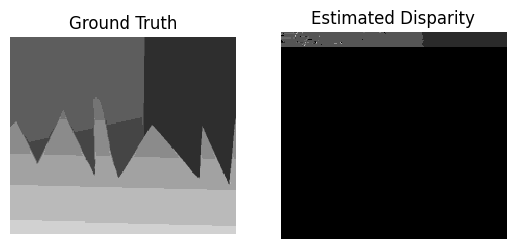

Processing scanline 14


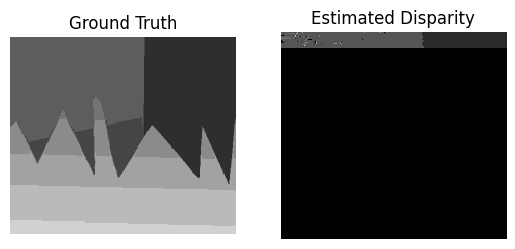

Processing scanline 15


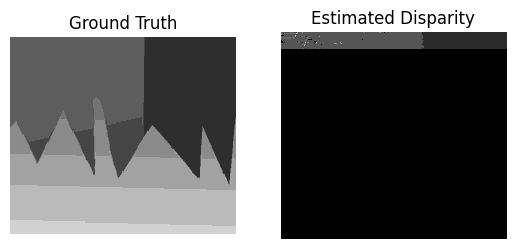

Processing scanline 16


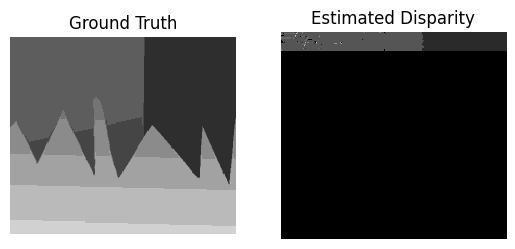

Processing scanline 17


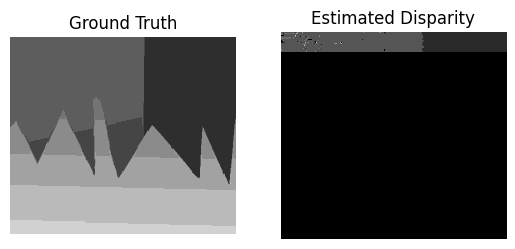

Processing scanline 18


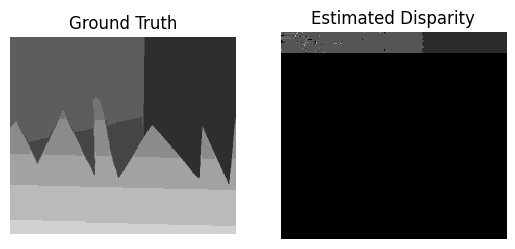

Processing scanline 19


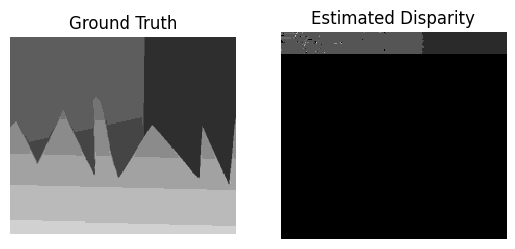

Processing scanline 20


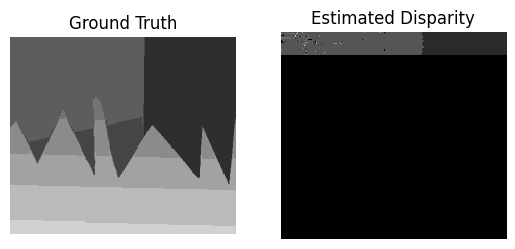

Processing scanline 21


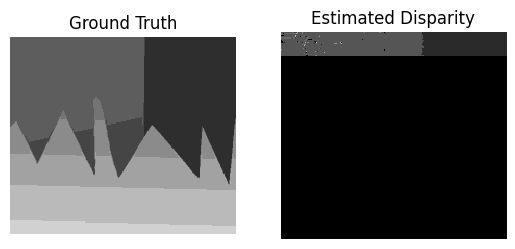

Processing scanline 22


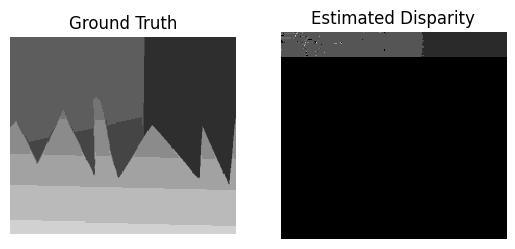

Processing scanline 23


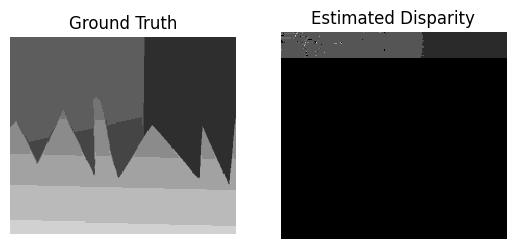

Processing scanline 24


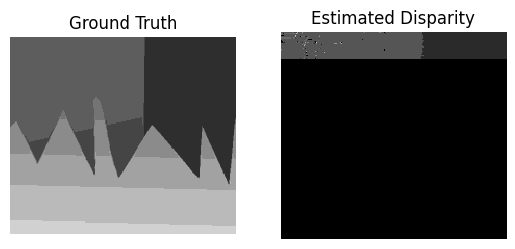

Processing scanline 25


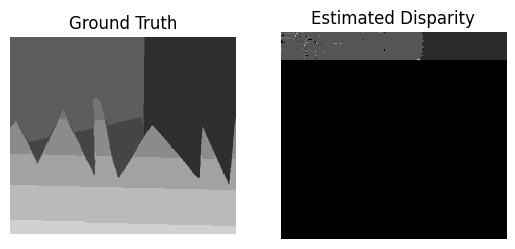

Processing scanline 26


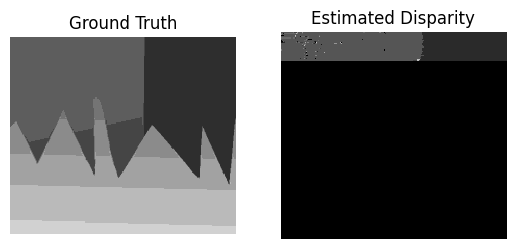

Processing scanline 27


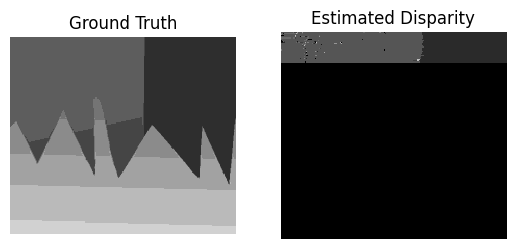

Processing scanline 28


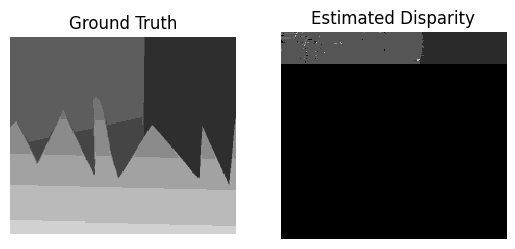

Processing scanline 29


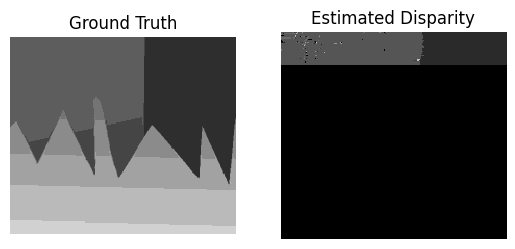

Processing scanline 30


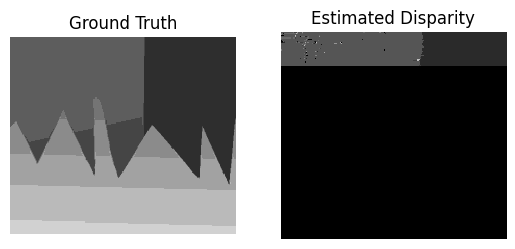

Processing scanline 31


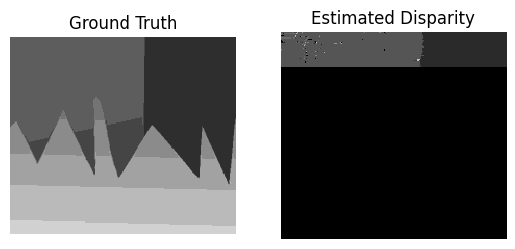

Processing scanline 32


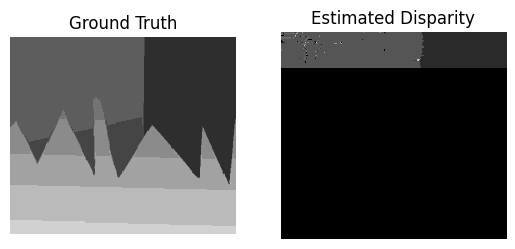

Processing scanline 33


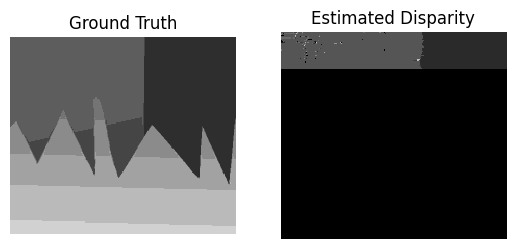

Processing scanline 34


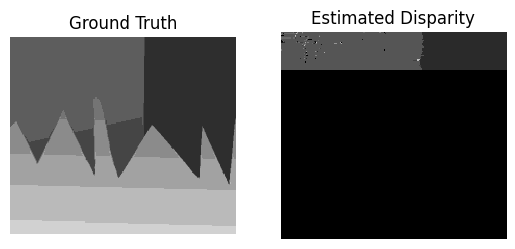

Processing scanline 35


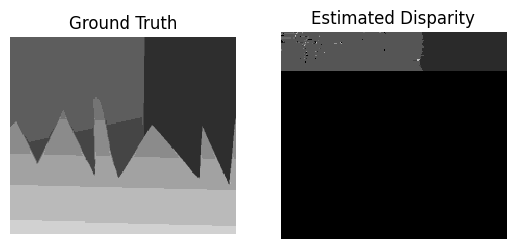

Processing scanline 36


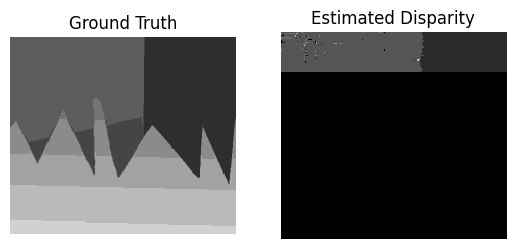

Processing scanline 37


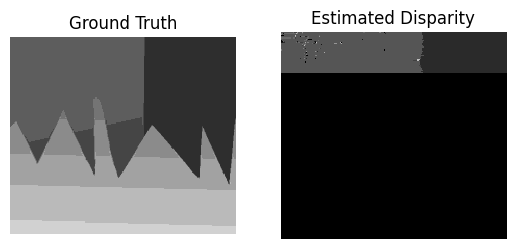

Processing scanline 38


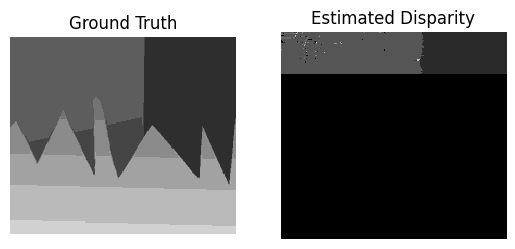

Processing scanline 39


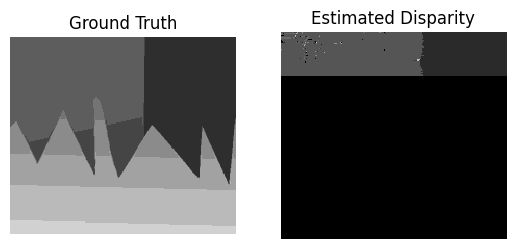

Processing scanline 40


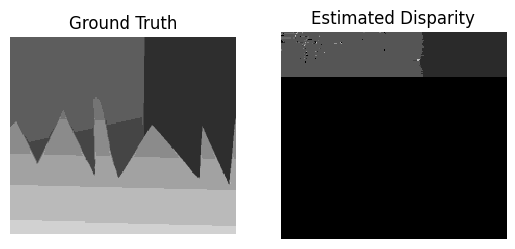

Processing scanline 41


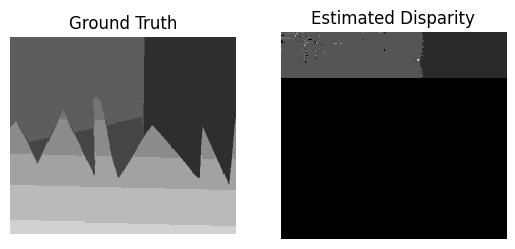

Processing scanline 42


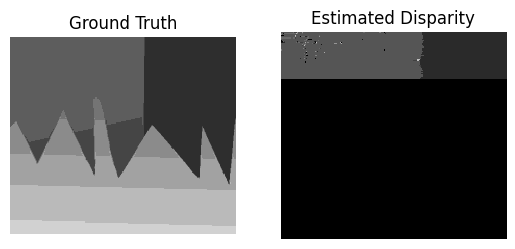

Processing scanline 43


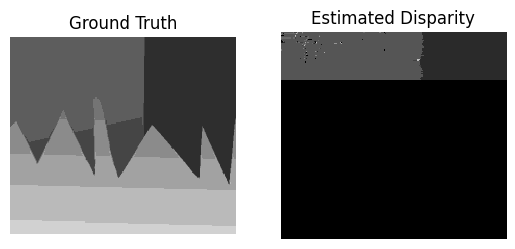

Processing scanline 44


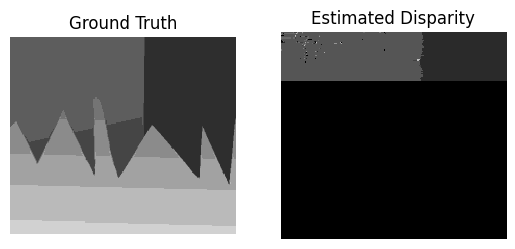

Processing scanline 45


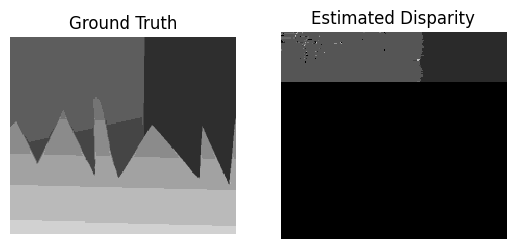

Processing scanline 46


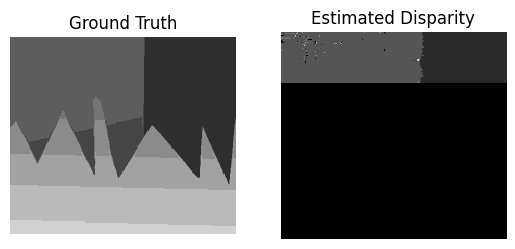

Processing scanline 47


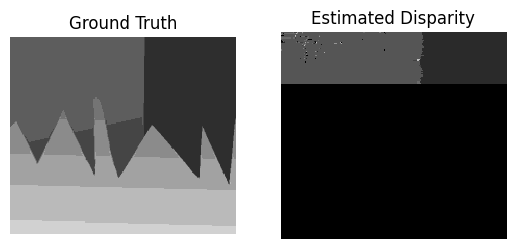

Processing scanline 48


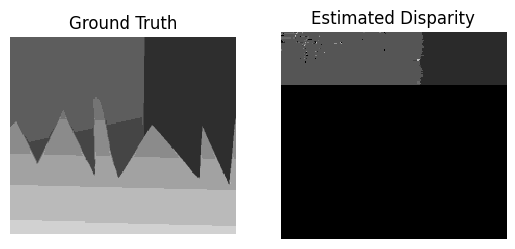

Processing scanline 49


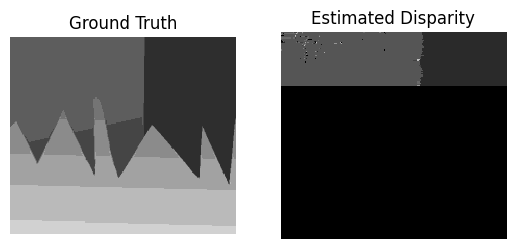

Processing scanline 50


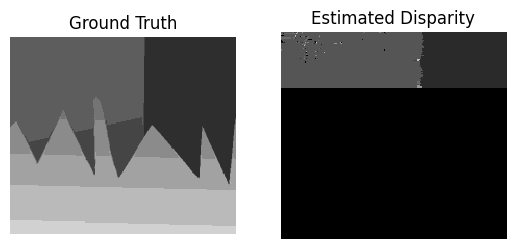

Processing scanline 51


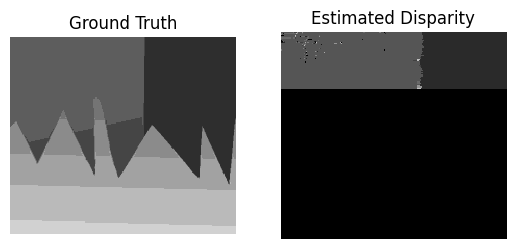

Processing scanline 52


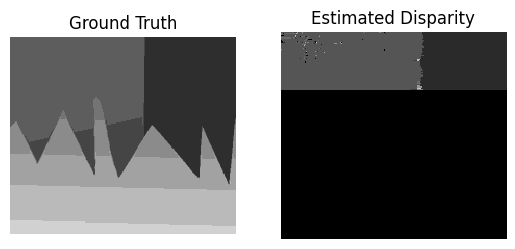

Processing scanline 53


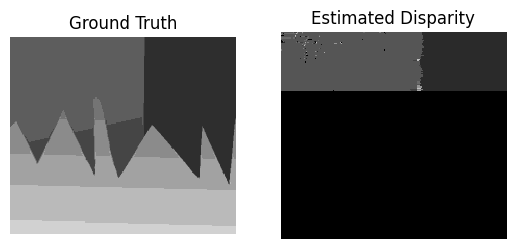

Processing scanline 54


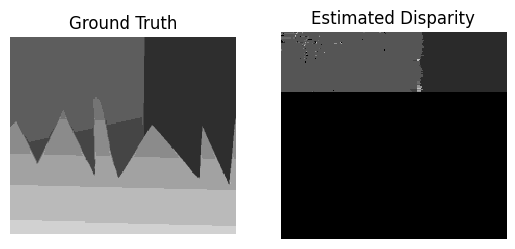

Processing scanline 55


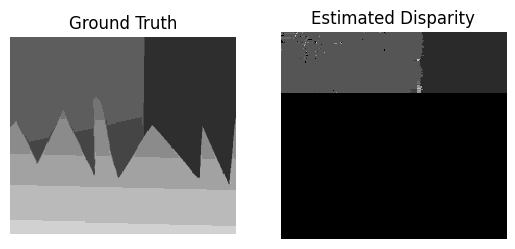

Processing scanline 56


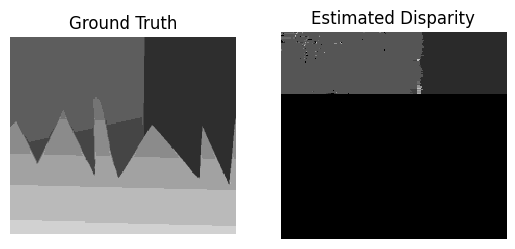

Processing scanline 57


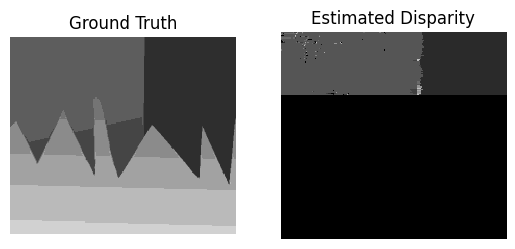

Processing scanline 58


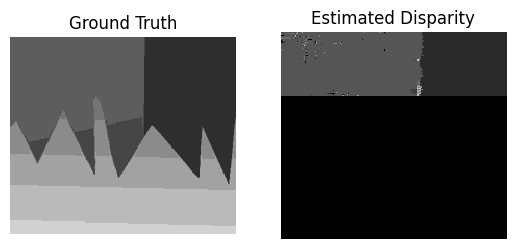

Processing scanline 59


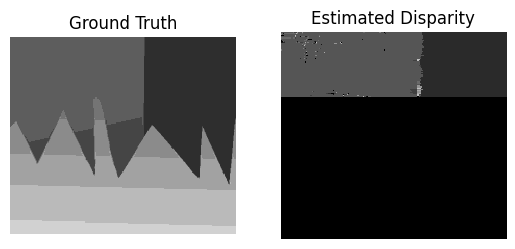

Processing scanline 60


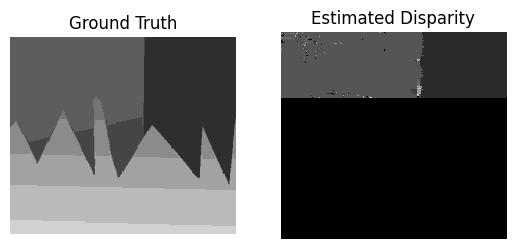

Processing scanline 61


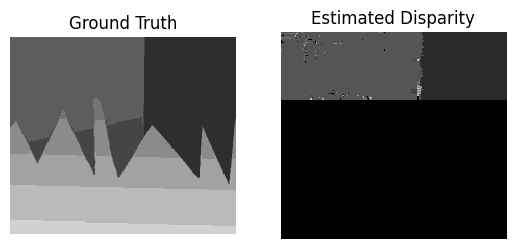

Processing scanline 62


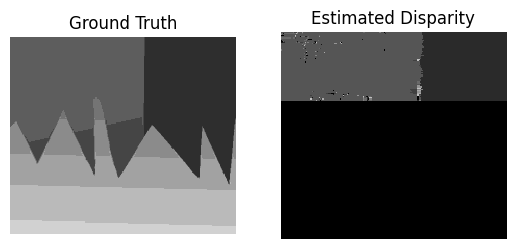

Processing scanline 63


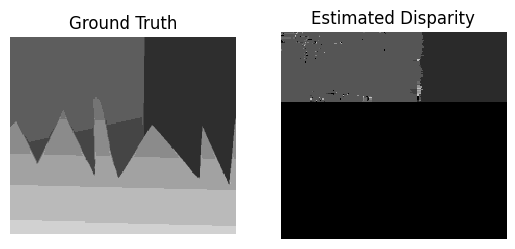

Processing scanline 64


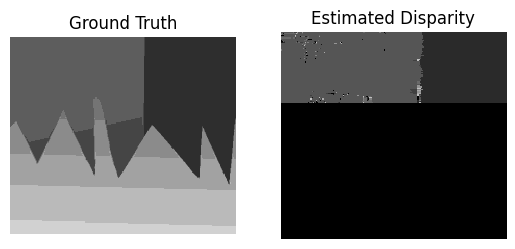

Processing scanline 65


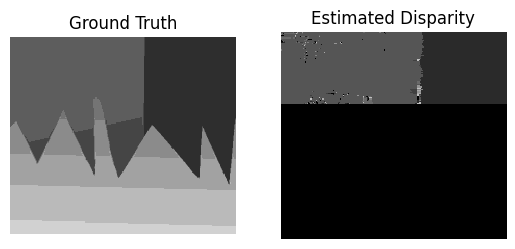

Processing scanline 66


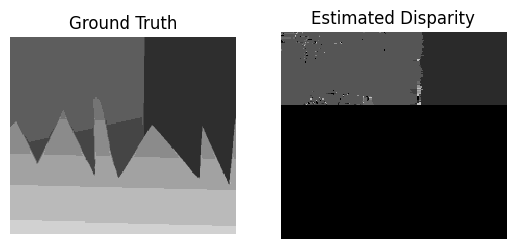

Processing scanline 67


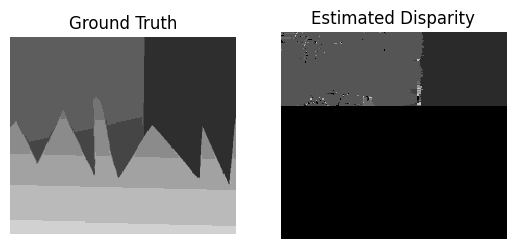

Processing scanline 68


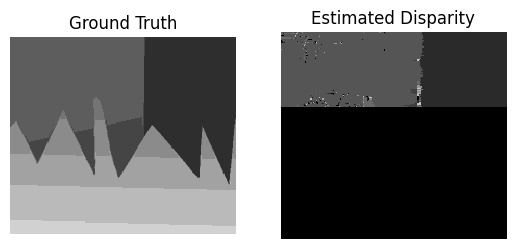

Processing scanline 69


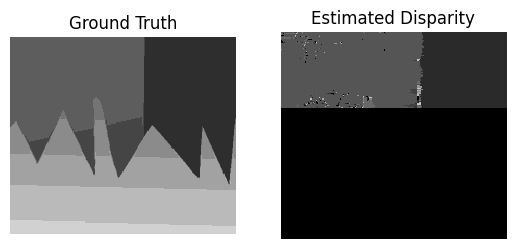

Processing scanline 70


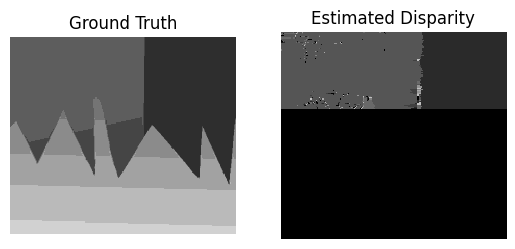

Processing scanline 71


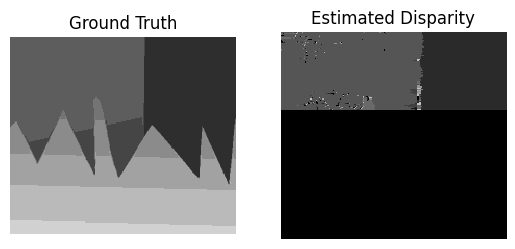

Processing scanline 72


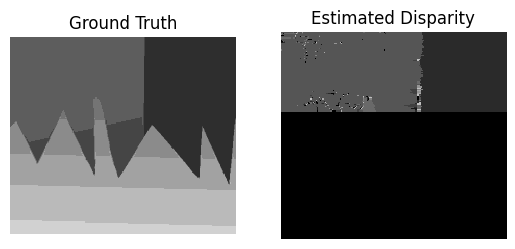

Processing scanline 73


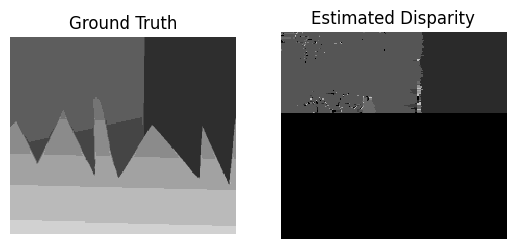

Processing scanline 74


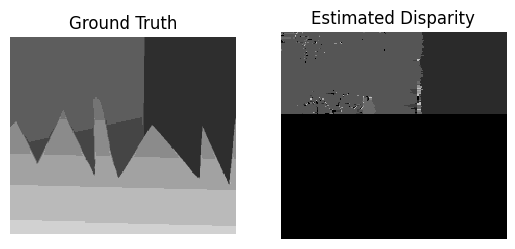

Processing scanline 75


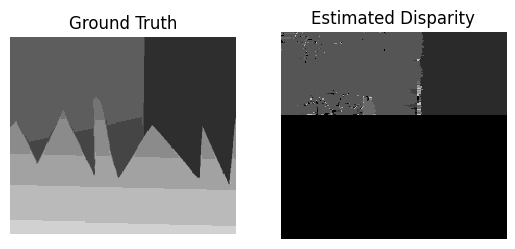

Processing scanline 76


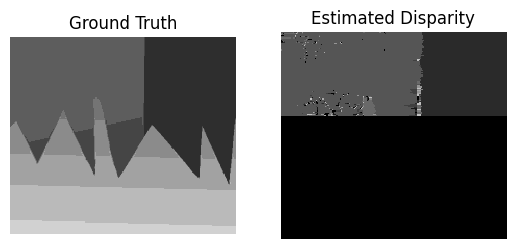

Processing scanline 77


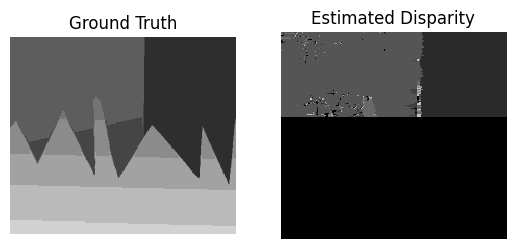

Processing scanline 78


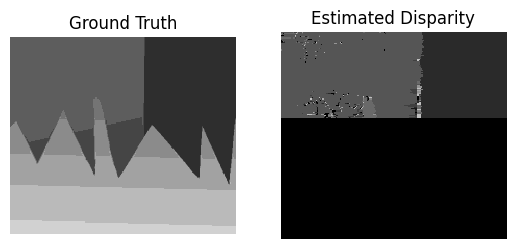

Processing scanline 79


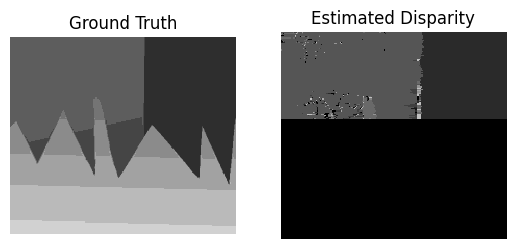

Processing scanline 80


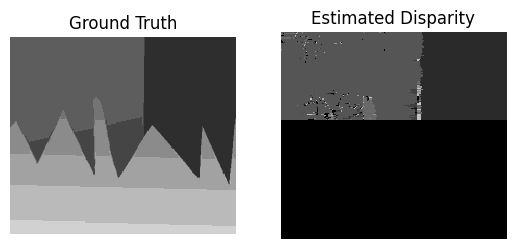

Processing scanline 81


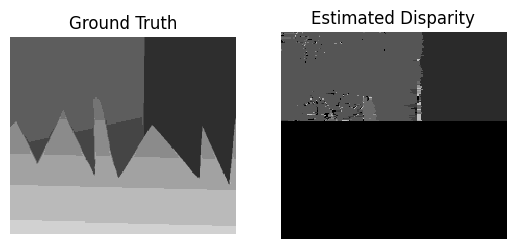

Processing scanline 82


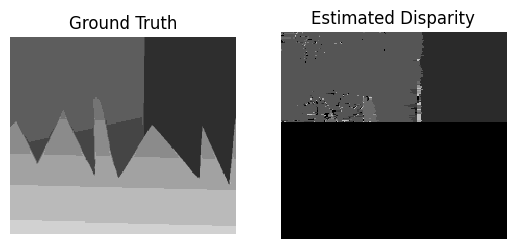

Processing scanline 83


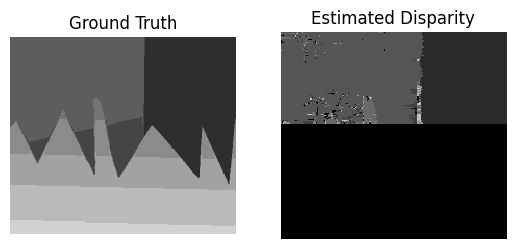

Processing scanline 84


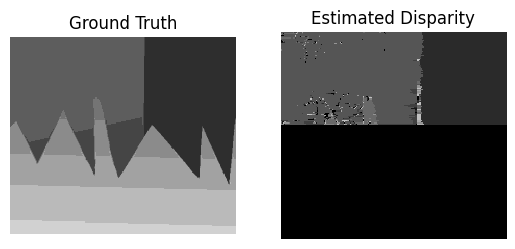

Processing scanline 85


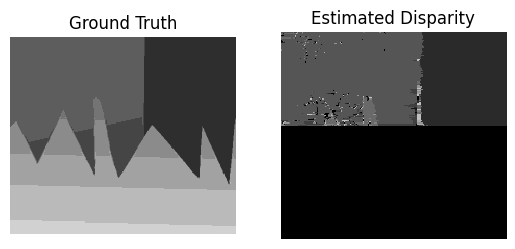

Processing scanline 86


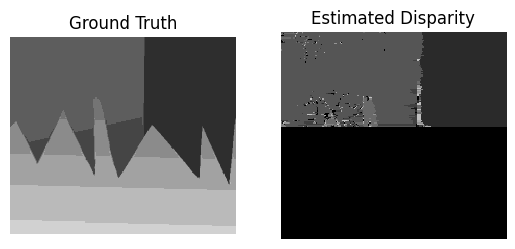

Processing scanline 87


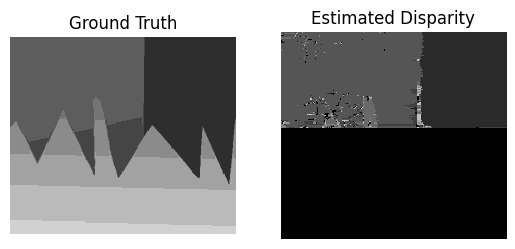

Processing scanline 88


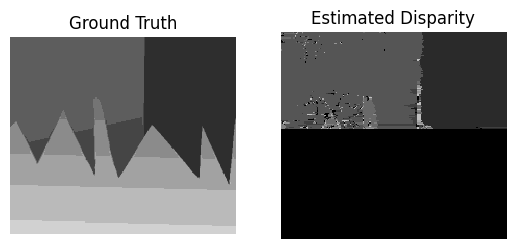

Processing scanline 89


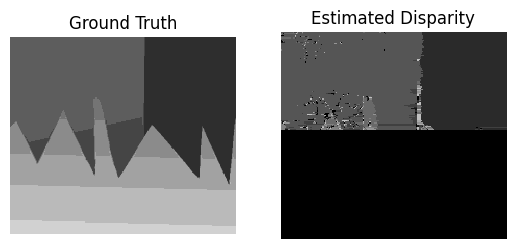

Processing scanline 90


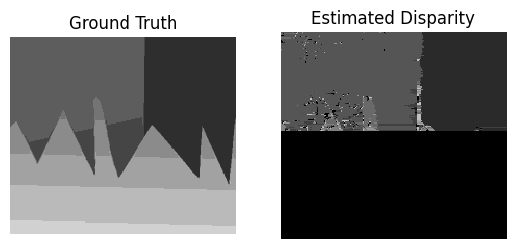

Processing scanline 91


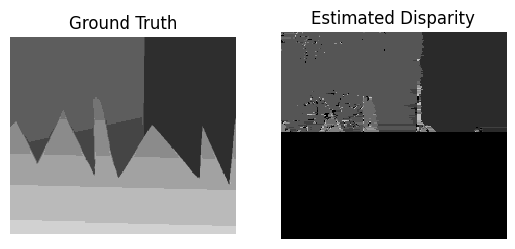

Processing scanline 92


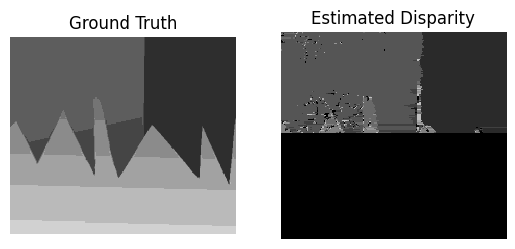

Processing scanline 93


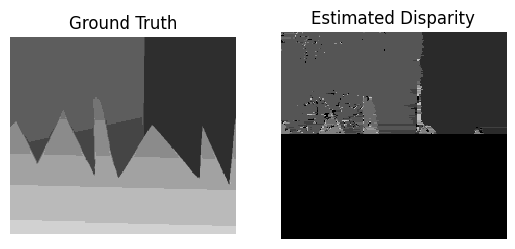

Processing scanline 94


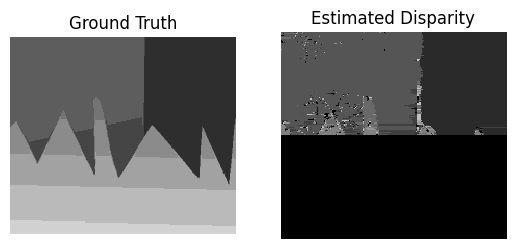

Processing scanline 95


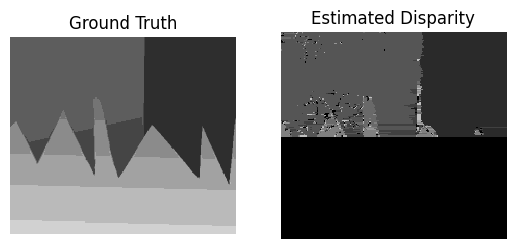

Processing scanline 96


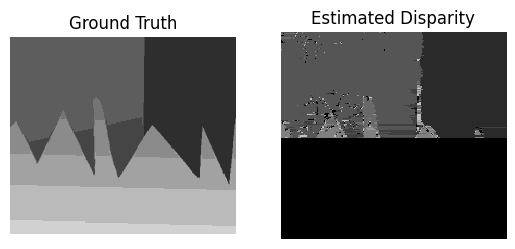

Processing scanline 97


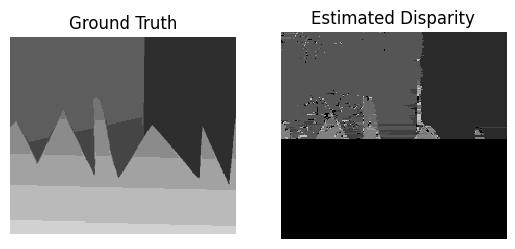

Processing scanline 98


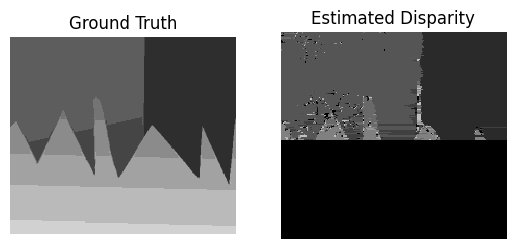

Processing scanline 99


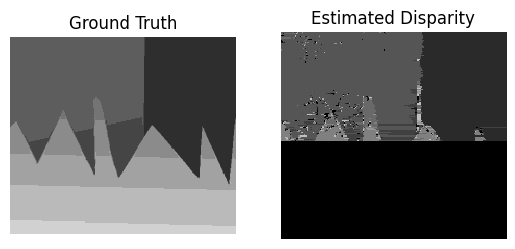

Processing scanline 100


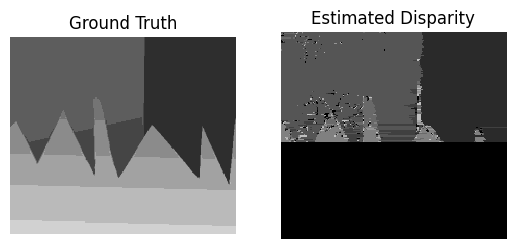

Processing scanline 101


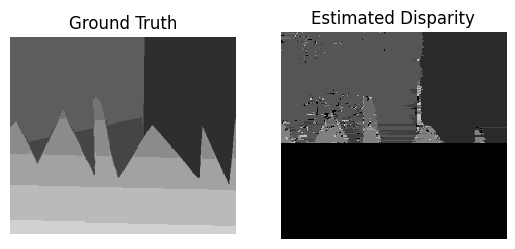

Processing scanline 102


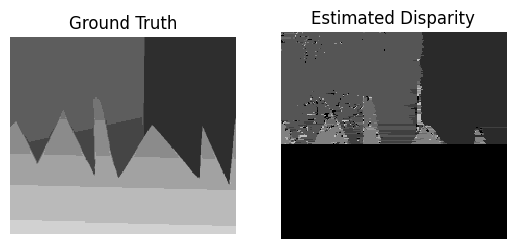

Processing scanline 103


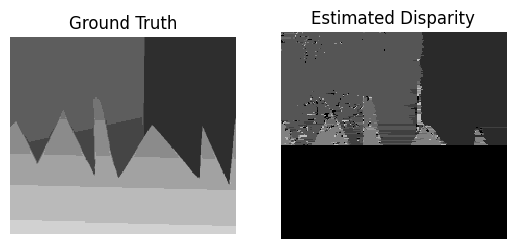

Processing scanline 104


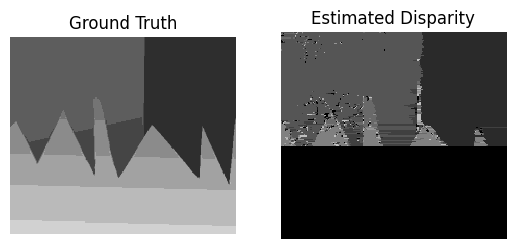

Processing scanline 105


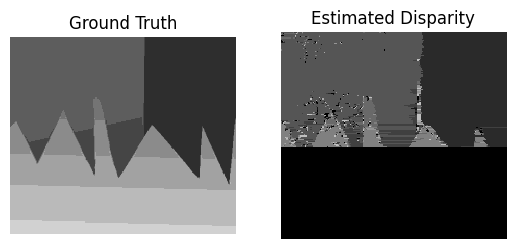

Processing scanline 106


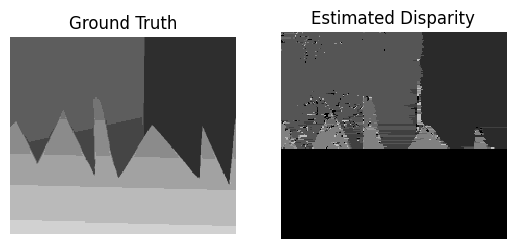

Processing scanline 107


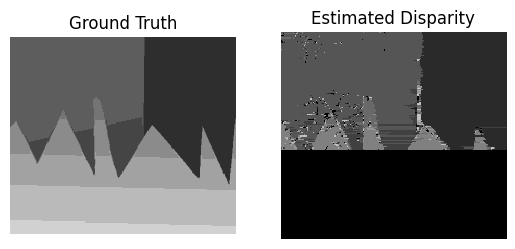

Processing scanline 108


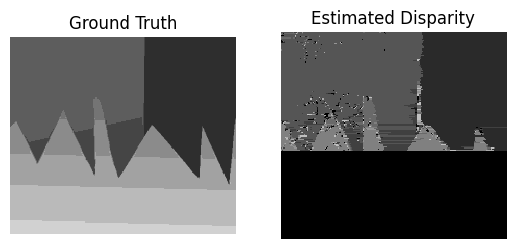

Processing scanline 109


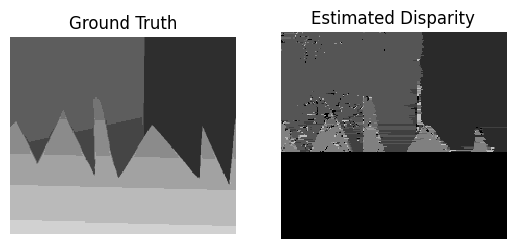

Processing scanline 110


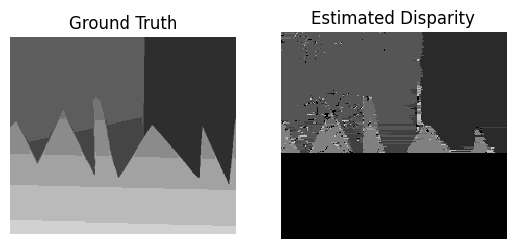

Processing scanline 111


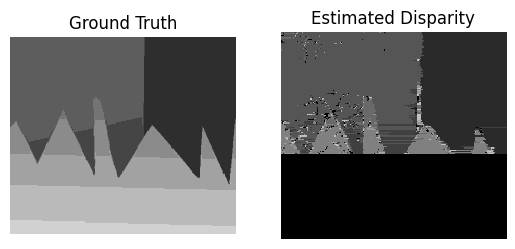

Processing scanline 112


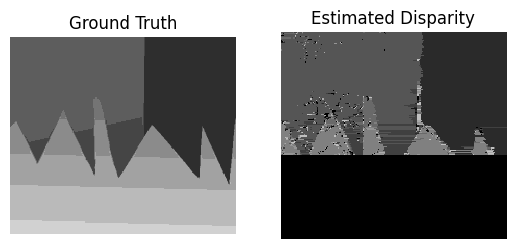

Processing scanline 113


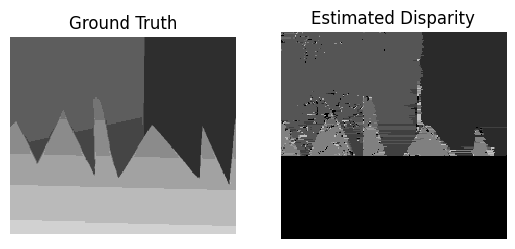

Processing scanline 114


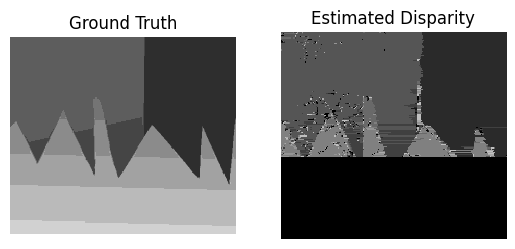

Processing scanline 115


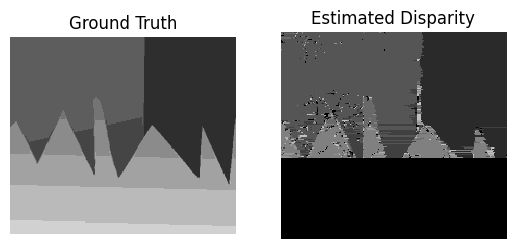

Processing scanline 116


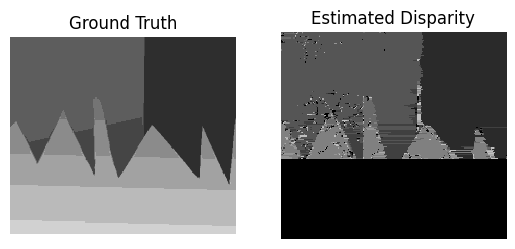

Processing scanline 117


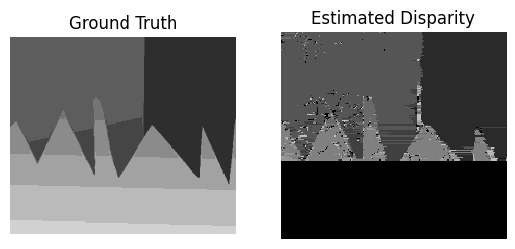

Processing scanline 118


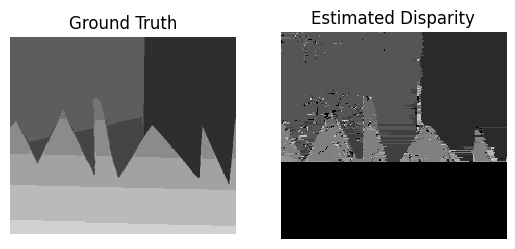

Processing scanline 119


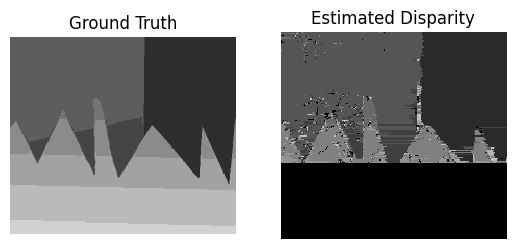

Processing scanline 120


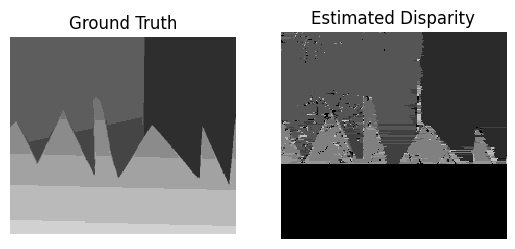

Processing scanline 121


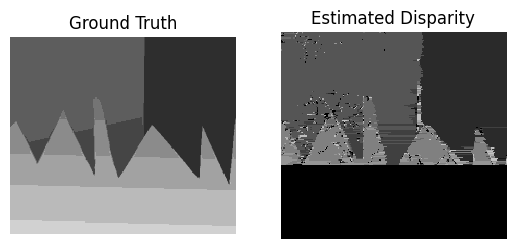

Processing scanline 122


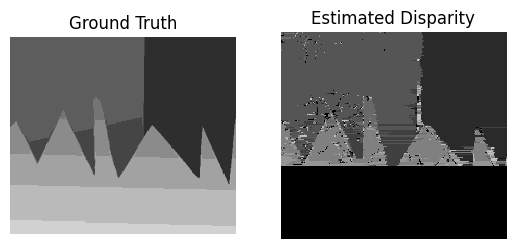

Processing scanline 123


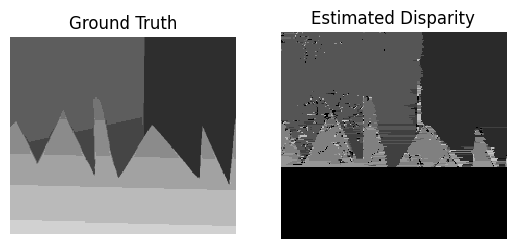

Processing scanline 124


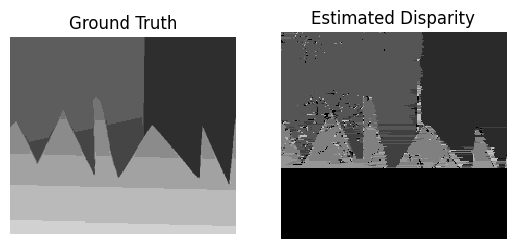

Processing scanline 125


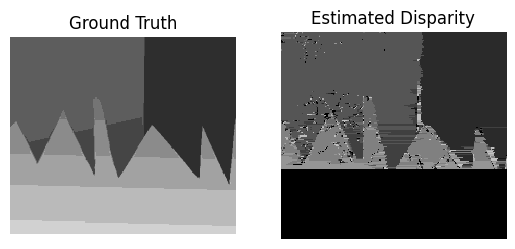

Processing scanline 126


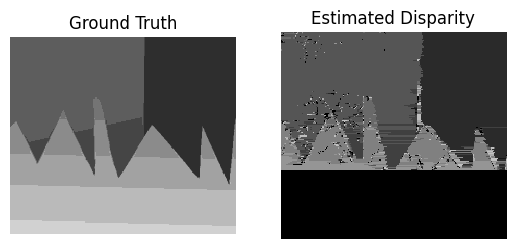

Processing scanline 127


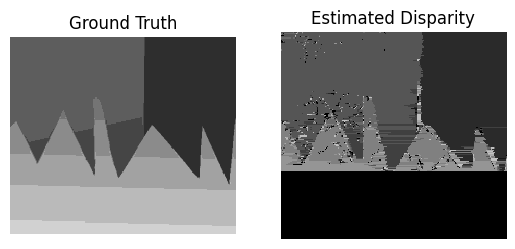

Processing scanline 128


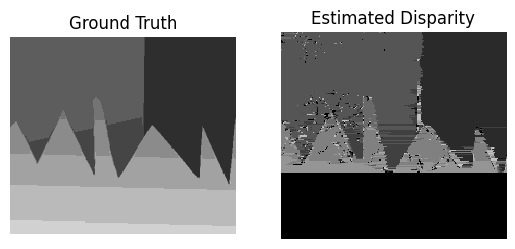

Processing scanline 129


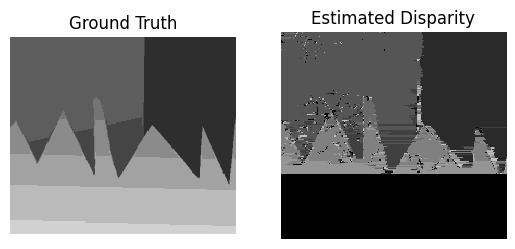

Processing scanline 130


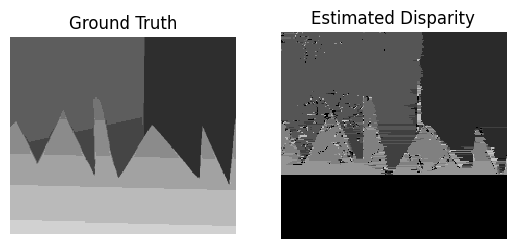

Processing scanline 131


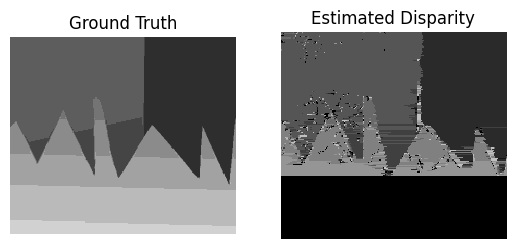

Processing scanline 132


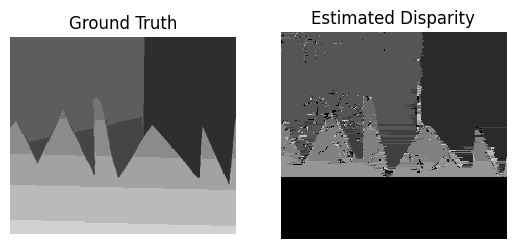

Processing scanline 133


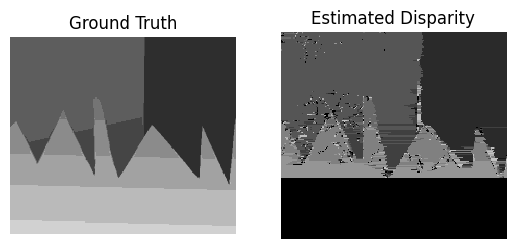

Processing scanline 134


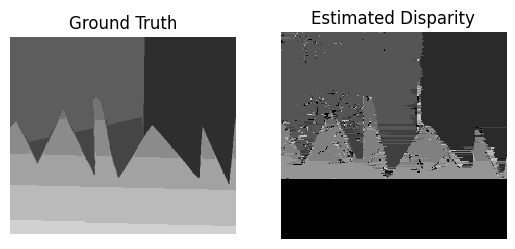

Processing scanline 135


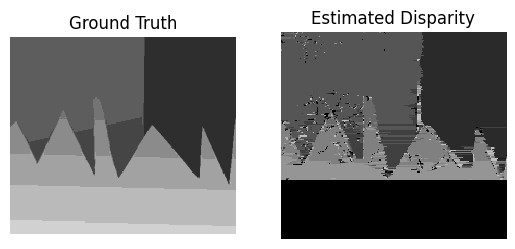

Processing scanline 136


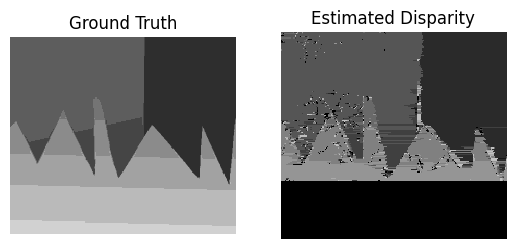

Processing scanline 137


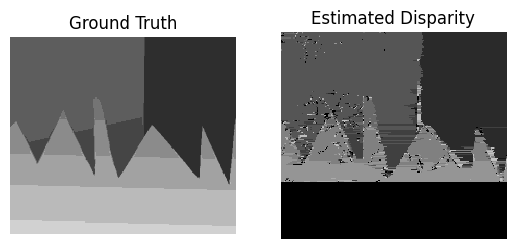

Processing scanline 138


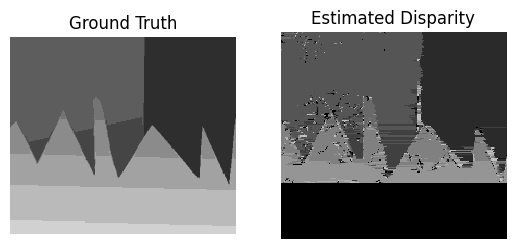

Processing scanline 139


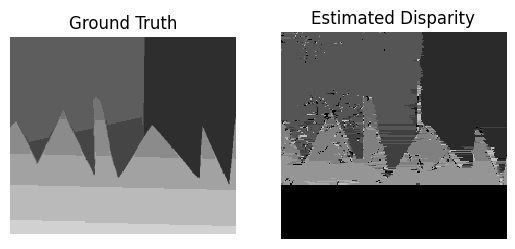

Processing scanline 140


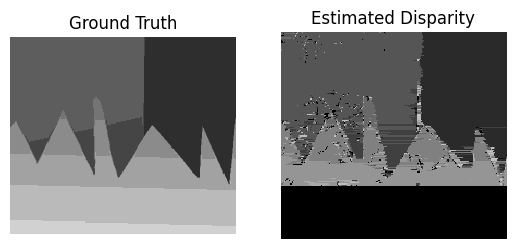

Processing scanline 141


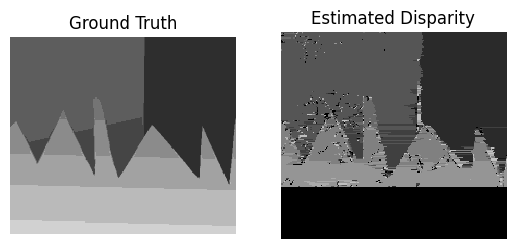

Processing scanline 142


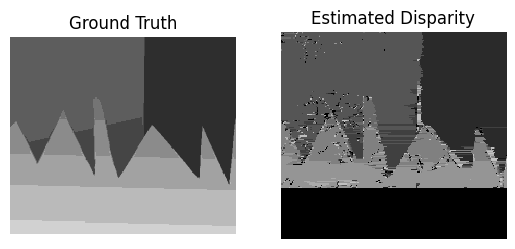

Processing scanline 143


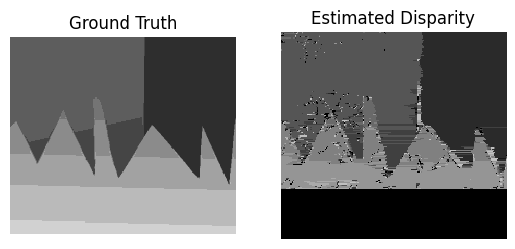

Processing scanline 144


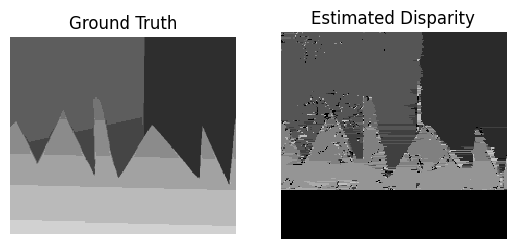

Processing scanline 145


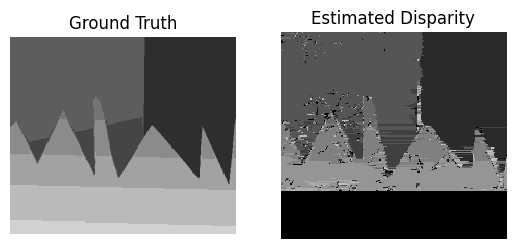

Processing scanline 146


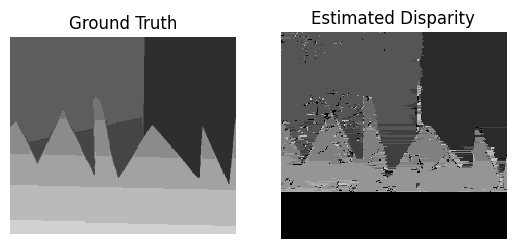

Processing scanline 147


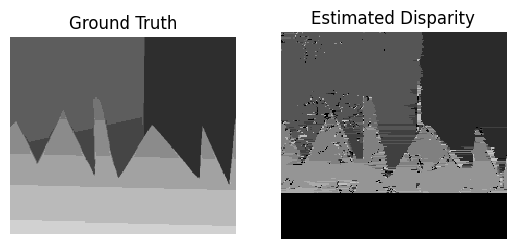

Processing scanline 148


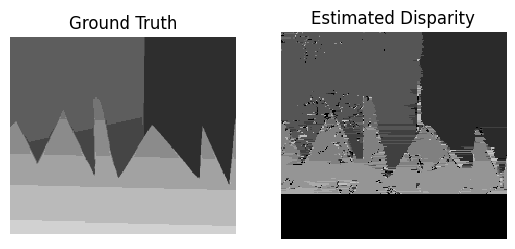

Processing scanline 149


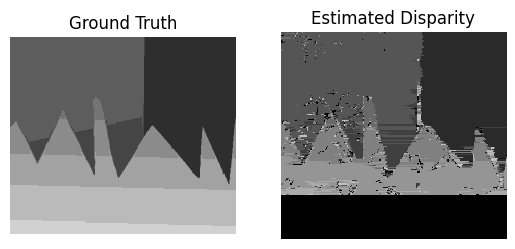

Processing scanline 150


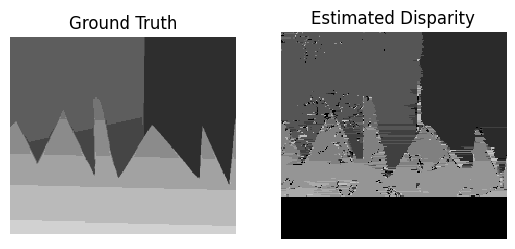

Processing scanline 151


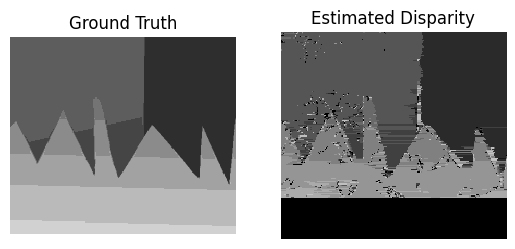

Processing scanline 152


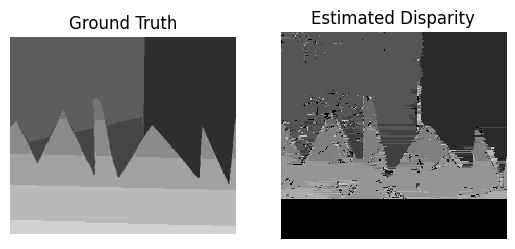

Processing scanline 153


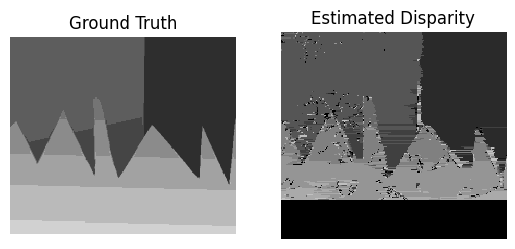

Processing scanline 154


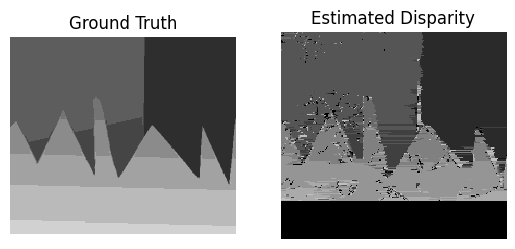

Processing scanline 155


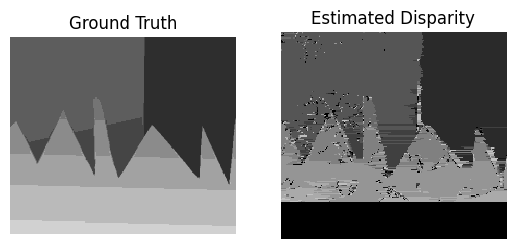

Processing scanline 156


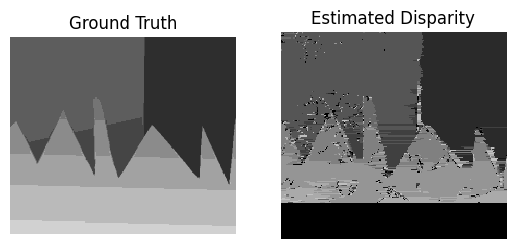

Processing scanline 157


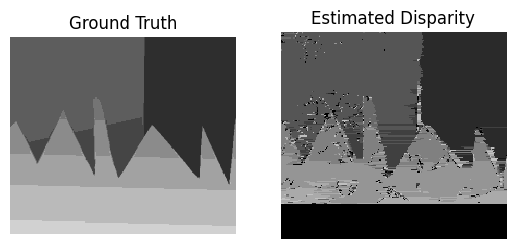

Processing scanline 158


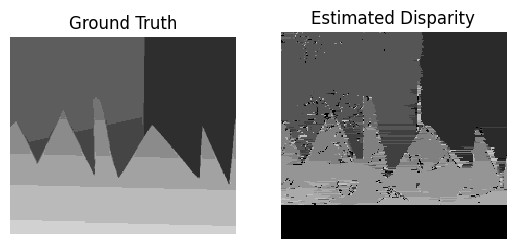

Processing scanline 159


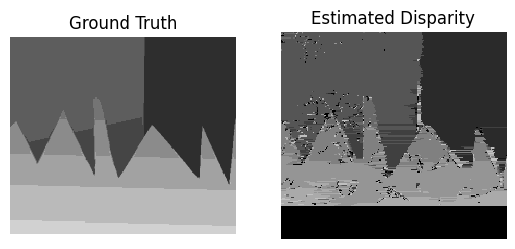

Processing scanline 160


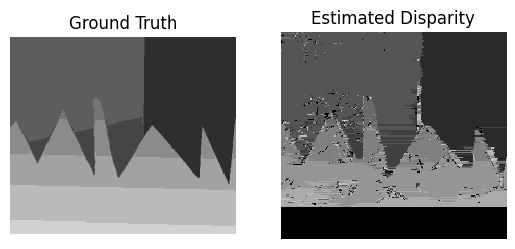

Processing scanline 161


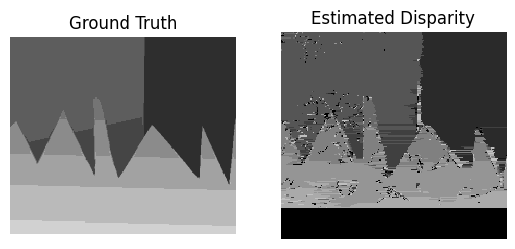

Processing scanline 162


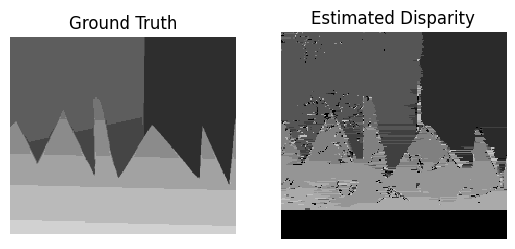

Processing scanline 163


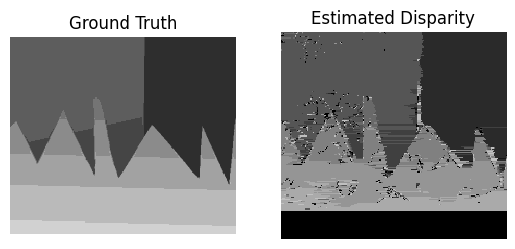

Processing scanline 164


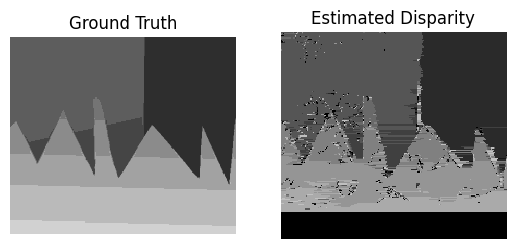

Processing scanline 165


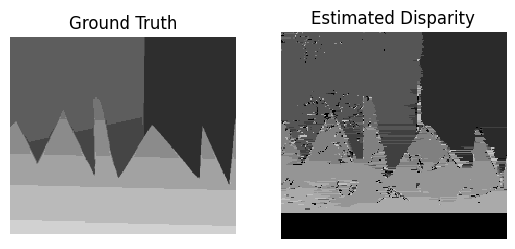

Processing scanline 166


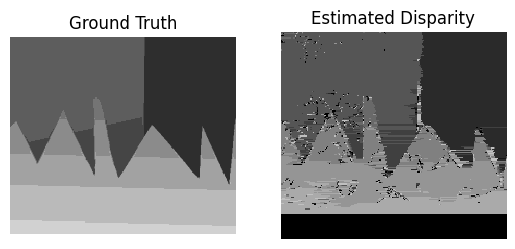

Processing scanline 167


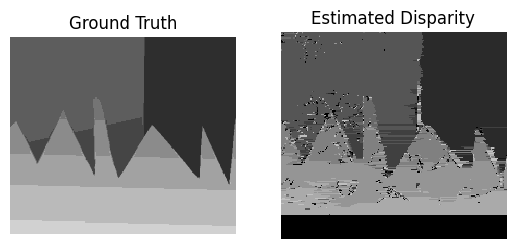

Processing scanline 168


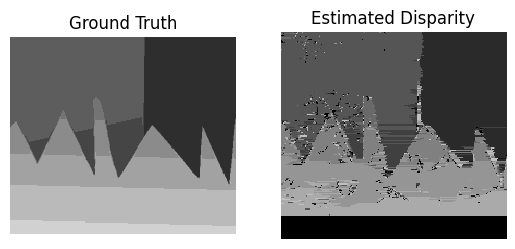

Processing scanline 169


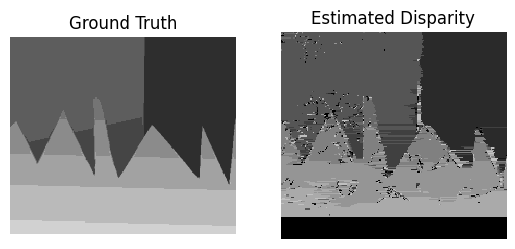

Processing scanline 170


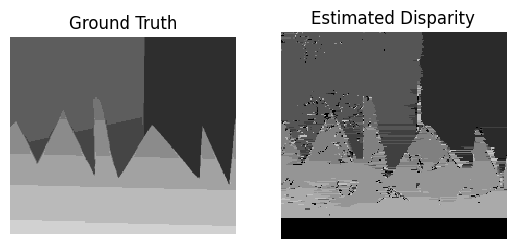

Processing scanline 171


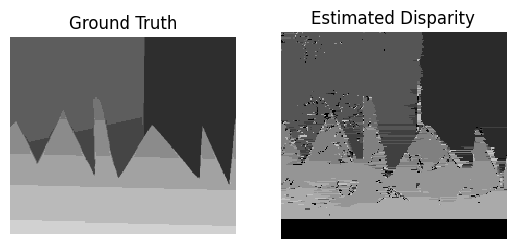

Processing scanline 172


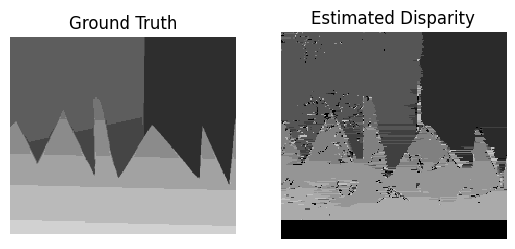

Processing scanline 173


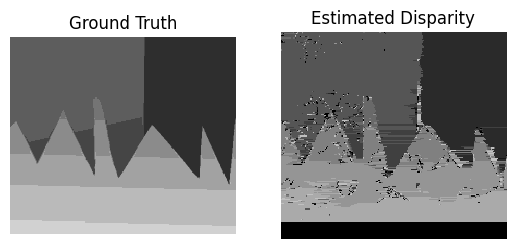

Processing scanline 174


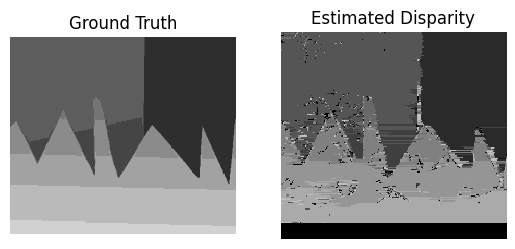

Processing scanline 175


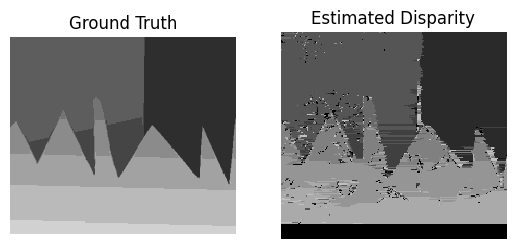

Processing scanline 176


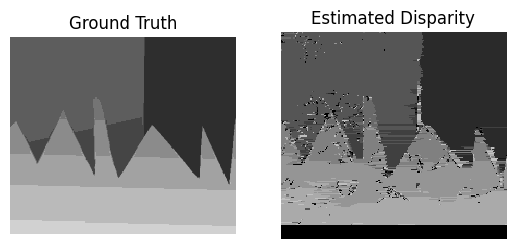

Processing scanline 177


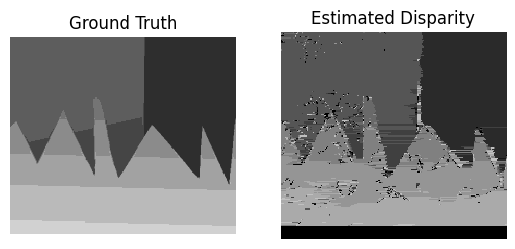

Processing scanline 178


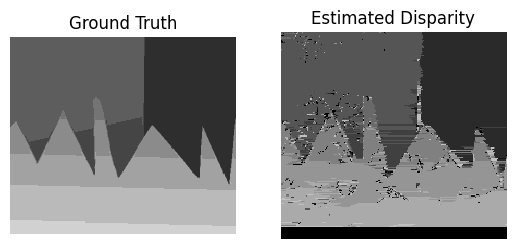

Processing scanline 179


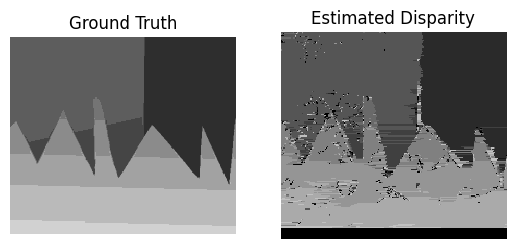

Processing scanline 180


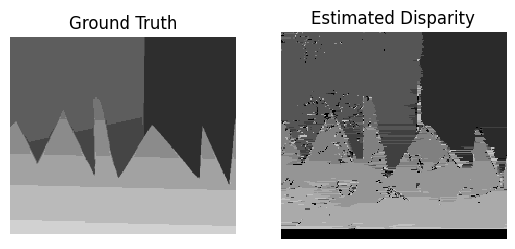

Processing scanline 181


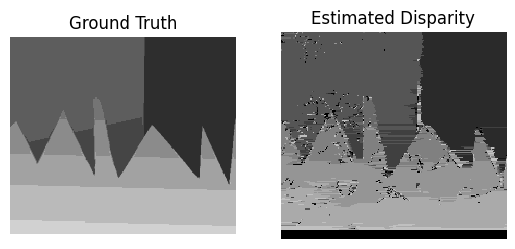

Processing scanline 182


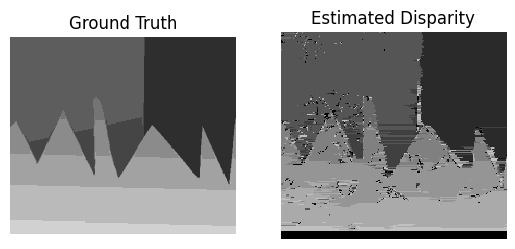

Processing scanline 183


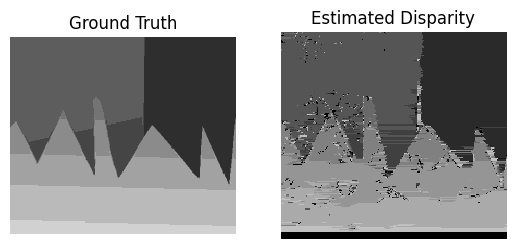

Processing scanline 184


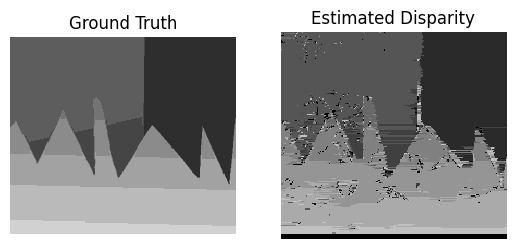

Processing scanline 185


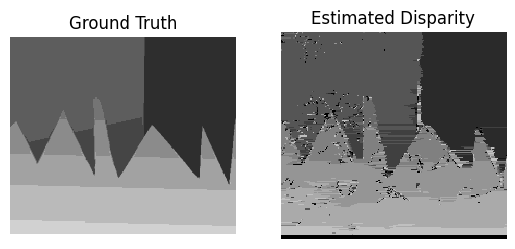

Processing scanline 186


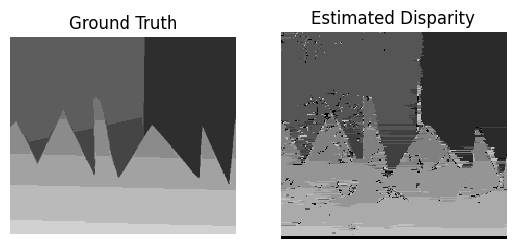

Processing scanline 187


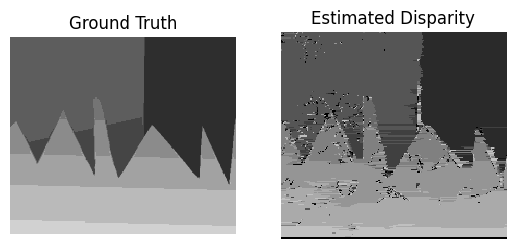

Processing scanline 188


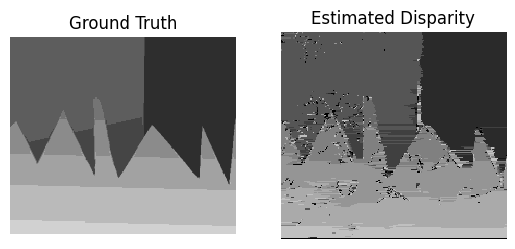

Processing scanline 189


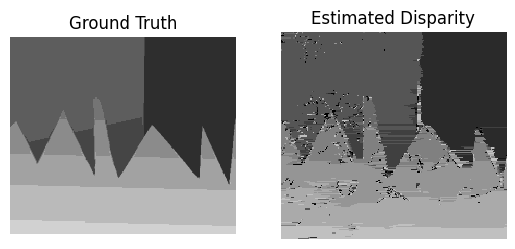

In [16]:
# figure out size of image
imY = len(im1)
imX = len(im1[0])

# define maximum disparity 
maxDisp = 10

# set up pairwiseCosts - we will define a fixed cost of alpha for changing
# disparity or zero cost for staying the same
alpha = 1
pairwiseCosts = alpha*np.ones([maxDisp,maxDisp])-alpha*np.eye(maxDisp)

# initialize the disparity map that we will estimate
estDisp = np.zeros([imY,imX-maxDisp])

# define standard deviation of noise
noiseSD = 6

# display ground truth and estimated disparity
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
ax2.axis('off')
plt.show()

# Run through each line of image
for cY in range(imY):
    print('Processing scanline', cY)
    
    # Define unary costs - we will not use the last few columns of the
    # image as the disparity might map the pixel outside the valid area of
    # the second image
    unaryCosts = np.zeros([maxDisp, imX - maxDisp])
    
    for cDisp in range(maxDisp):
        cost = np.zeros(imX - maxDisp)
        for cX in range(imX - maxDisp):
            # Calculate the squared difference between the pixel in im1 and the corresponding pixel in im2 shifted by disparity
            intensity_diff = im1[cY, cX] - im2[cY, cX + cDisp]
            cost[cX] = (intensity_diff ** 2) / (2 * noiseSD ** 2)
        # Store this cost in the unaryCosts matrix
        unaryCosts[cDisp, :] = cost
    
    # Call the dynamic programming function
    estDisp[cY, :] = dynamicProgram(unaryCosts, pairwiseCosts)
    
    # Display solution so far
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gtDisp, vmin=0, vmax=11, cmap='gray', interpolation='nearest', aspect='equal')
    ax1.axis('off')
    ax1.set_title('Ground Truth')
    ax2.imshow(estDisp, vmin=0, vmax=12, cmap='gray', interpolation='nearest', aspect='equal')
    ax2.axis('off')
    ax2.set_title('Estimated Disparity')
    plt.pause(0.01)  # Pause to update the plot
    plt.show()    

Processing scanline 0


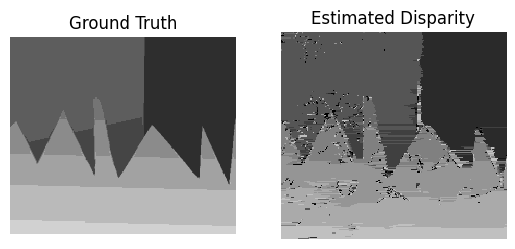

Processing scanline 1


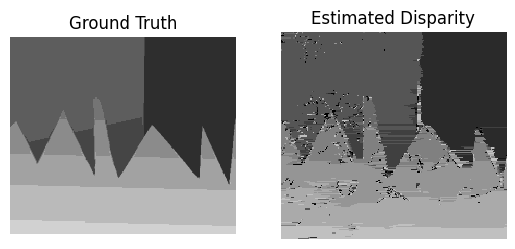

Processing scanline 2


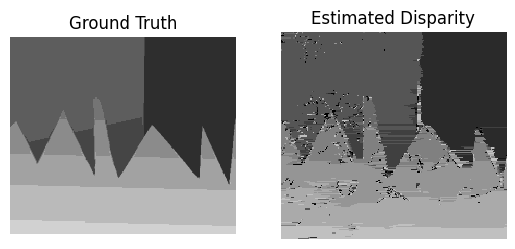

Processing scanline 3


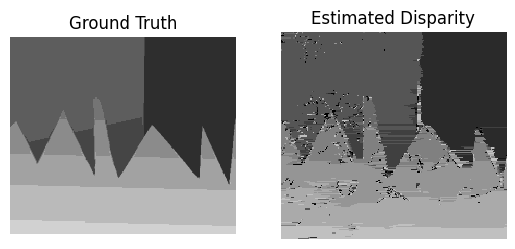

Processing scanline 4


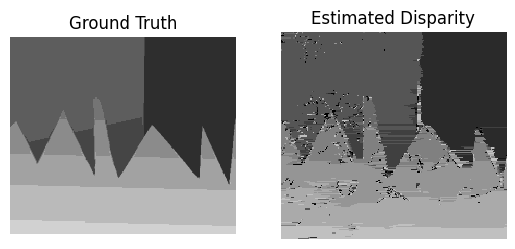

Processing scanline 5


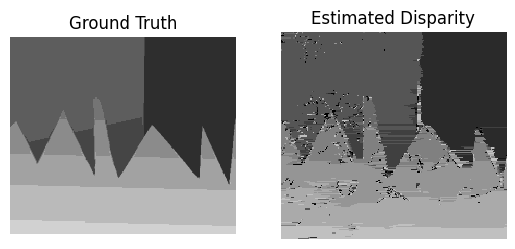

Processing scanline 6


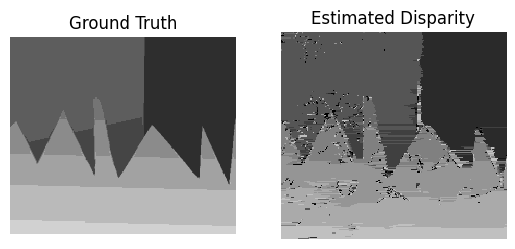

Processing scanline 7


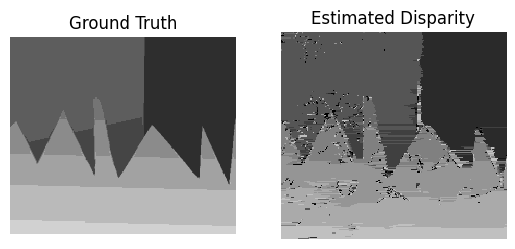

Processing scanline 8


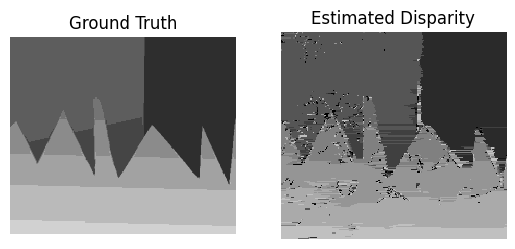

Processing scanline 9


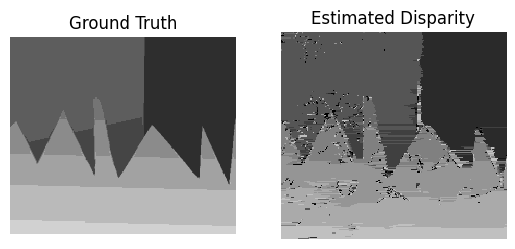

Processing scanline 10


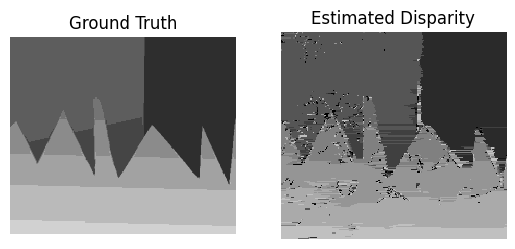

Processing scanline 11


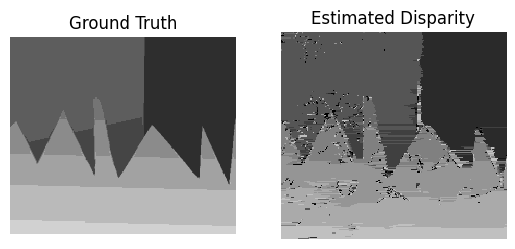

Processing scanline 12


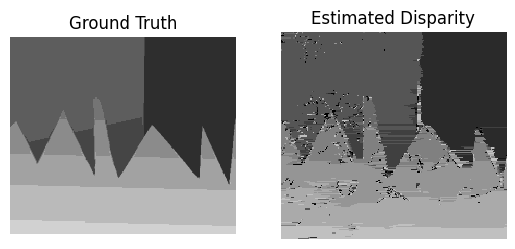

Processing scanline 13


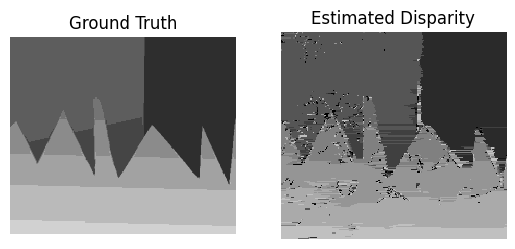

Processing scanline 14


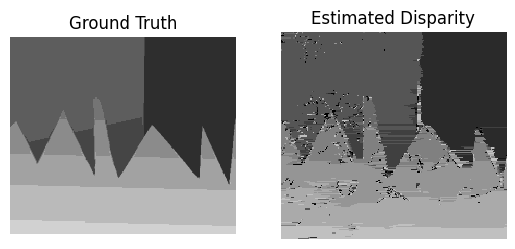

Processing scanline 15


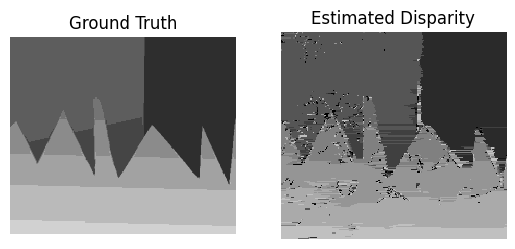

Processing scanline 16


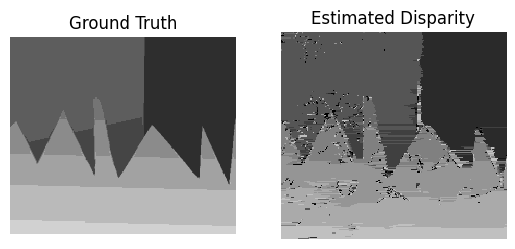

Processing scanline 17


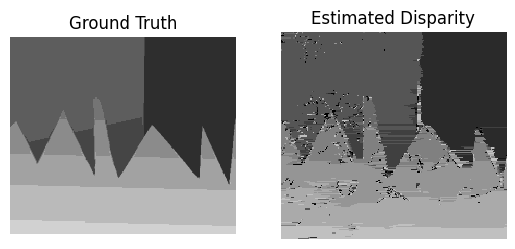

Processing scanline 18


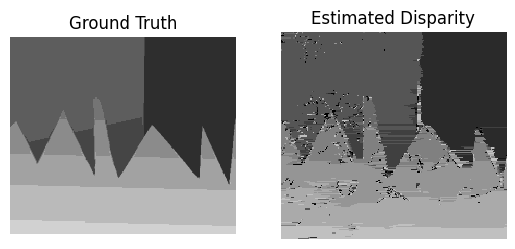

Processing scanline 19


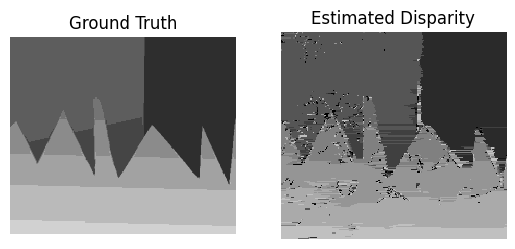

Processing scanline 20


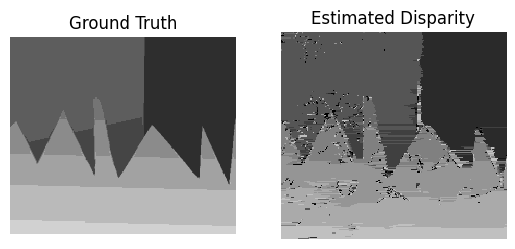

Processing scanline 21


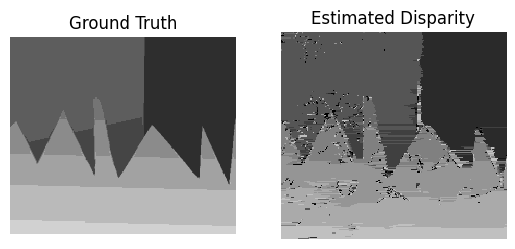

Processing scanline 22


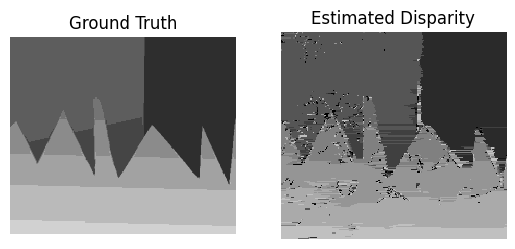

Processing scanline 23


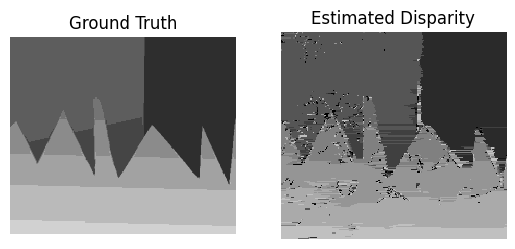

Processing scanline 24


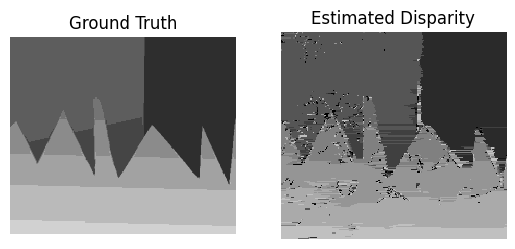

Processing scanline 25


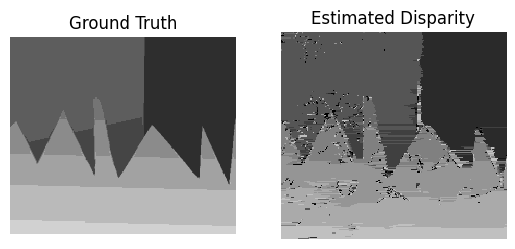

Processing scanline 26


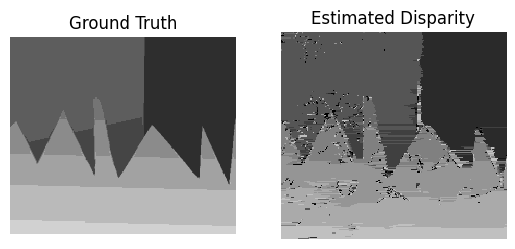

Processing scanline 27


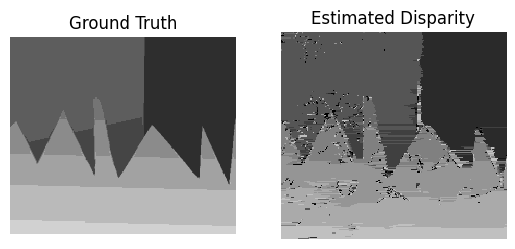

Processing scanline 28


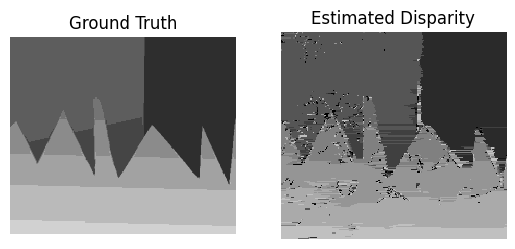

Processing scanline 29


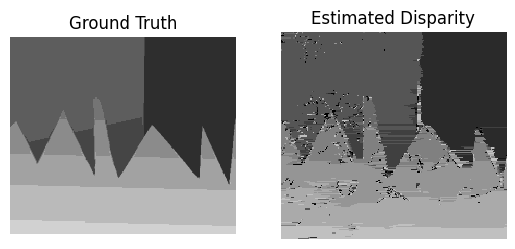

Processing scanline 30


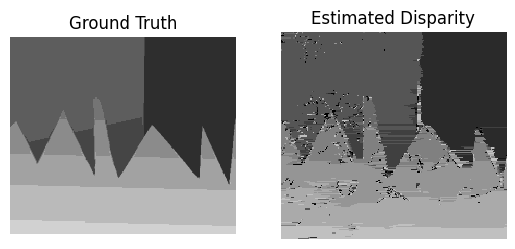

Processing scanline 31


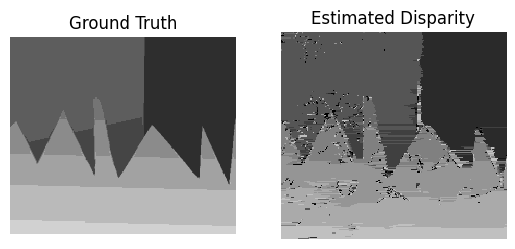

Processing scanline 32


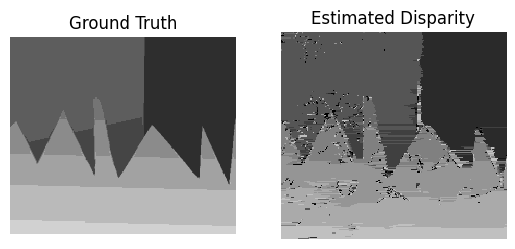

Processing scanline 33


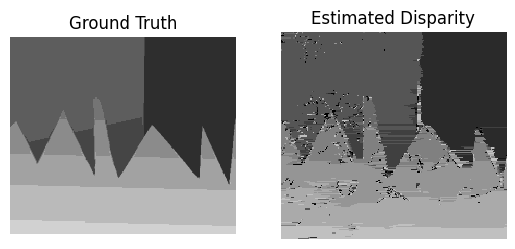

Processing scanline 34


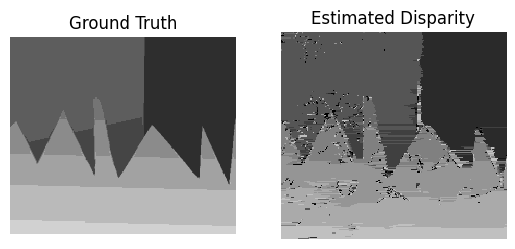

Processing scanline 35


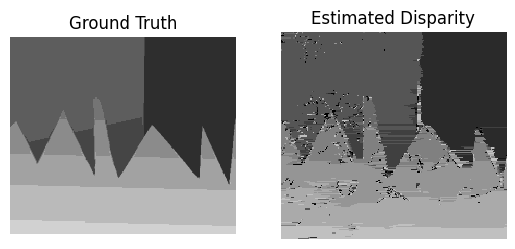

Processing scanline 36


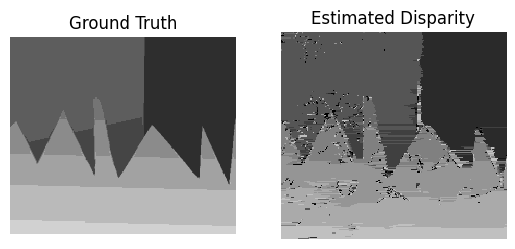

Processing scanline 37


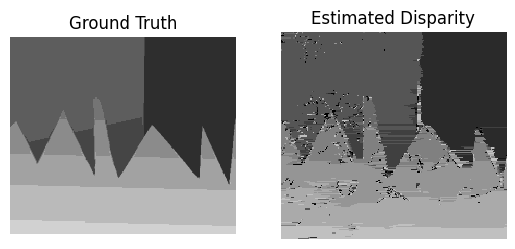

Processing scanline 38


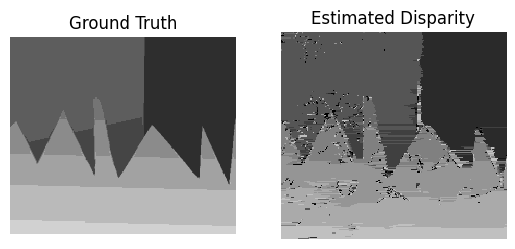

Processing scanline 39


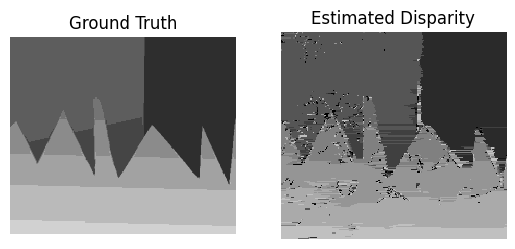

Processing scanline 40


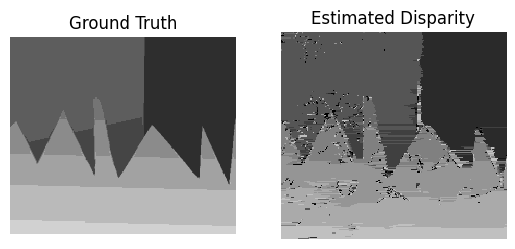

Processing scanline 41


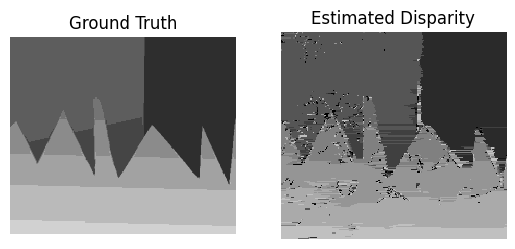

Processing scanline 42


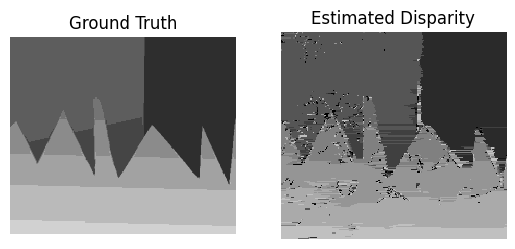

Processing scanline 43


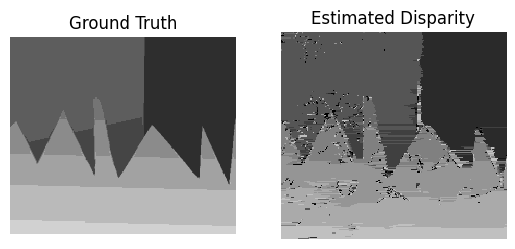

Processing scanline 44


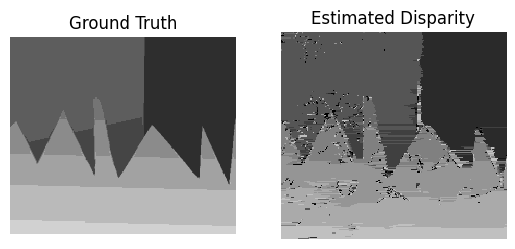

Processing scanline 45


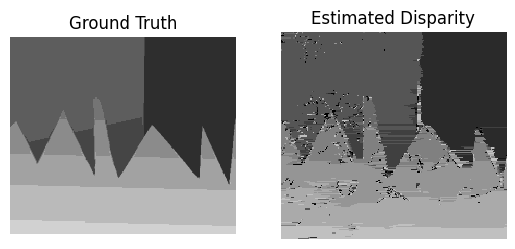

Processing scanline 46


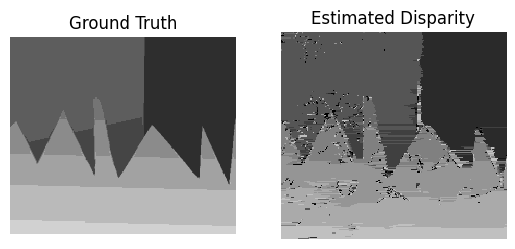

Processing scanline 47


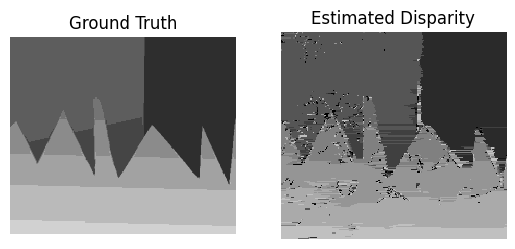

Processing scanline 48


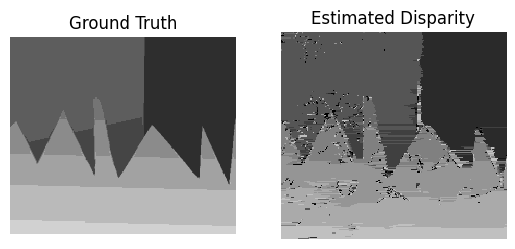

Processing scanline 49


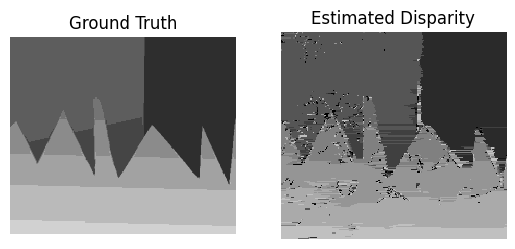

Processing scanline 50


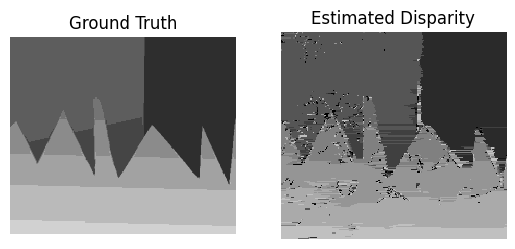

Processing scanline 51


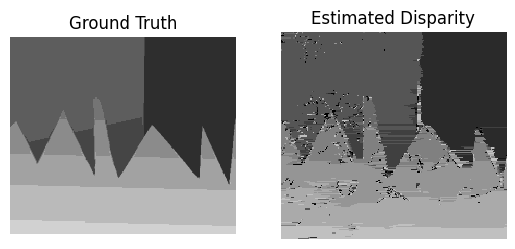

Processing scanline 52


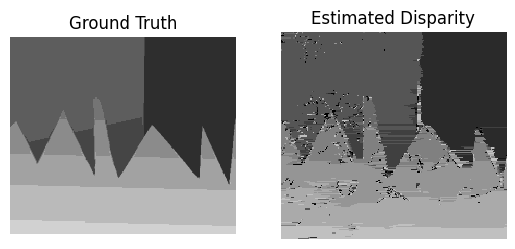

Processing scanline 53


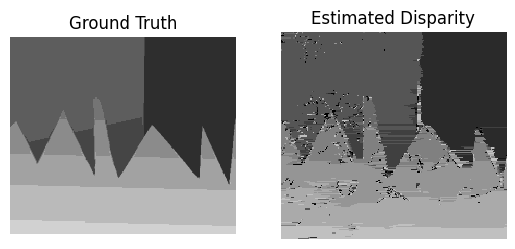

Processing scanline 54


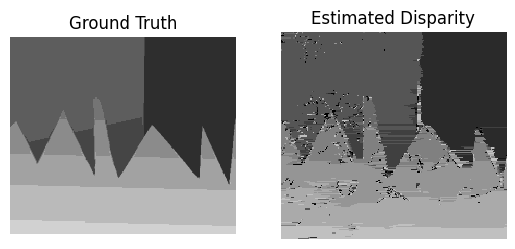

Processing scanline 55


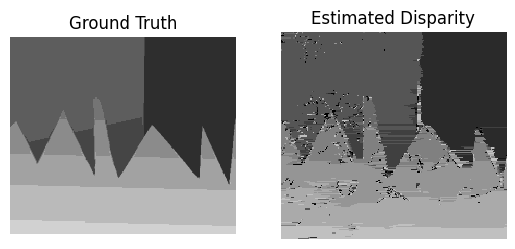

Processing scanline 56


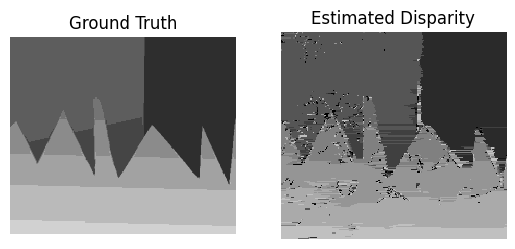

Processing scanline 57


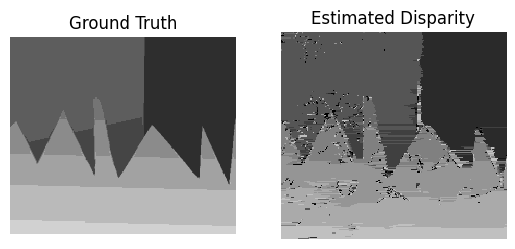

Processing scanline 58


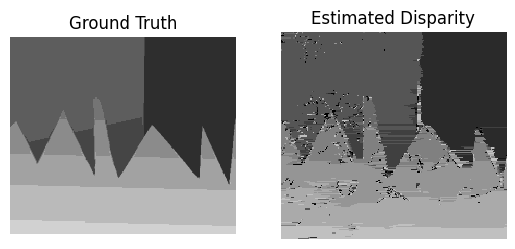

Processing scanline 59


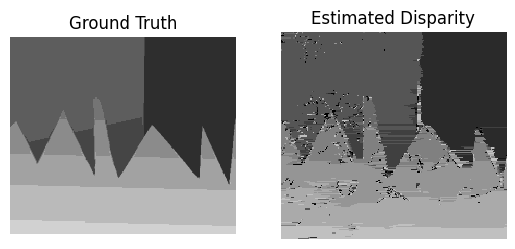

Processing scanline 60


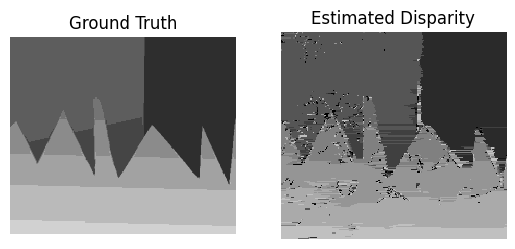

Processing scanline 61


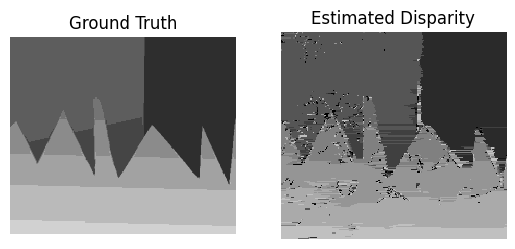

Processing scanline 62


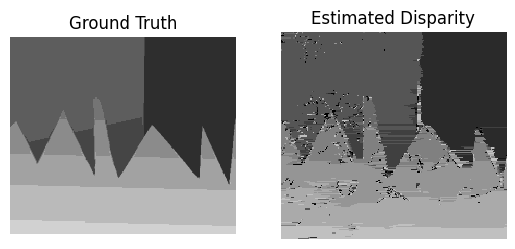

Processing scanline 63


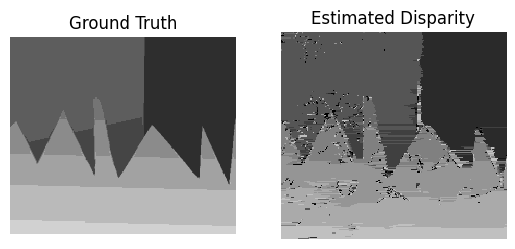

Processing scanline 64


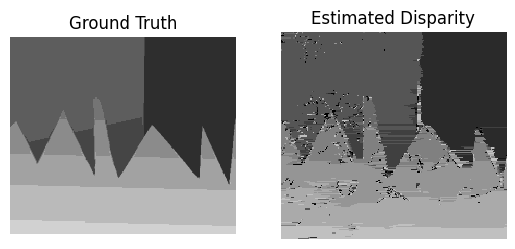

Processing scanline 65


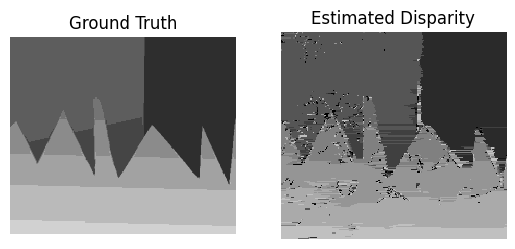

Processing scanline 66


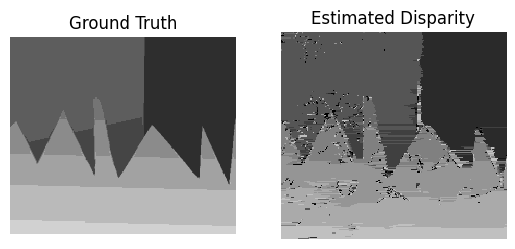

Processing scanline 67


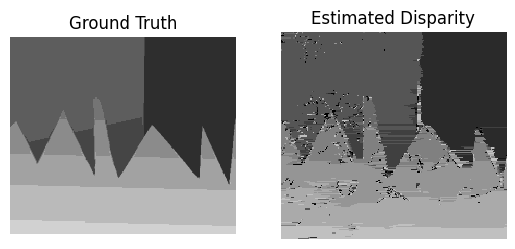

Processing scanline 68


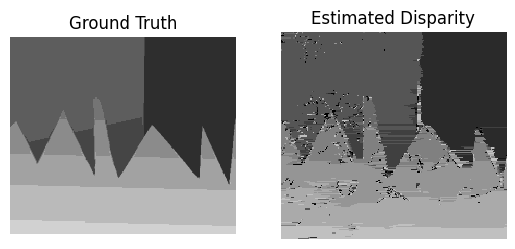

Processing scanline 69


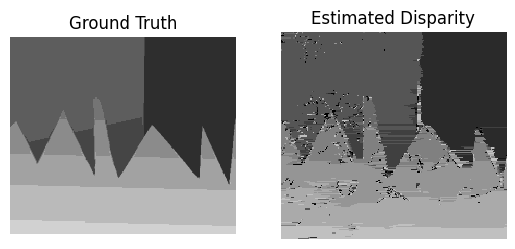

Processing scanline 70


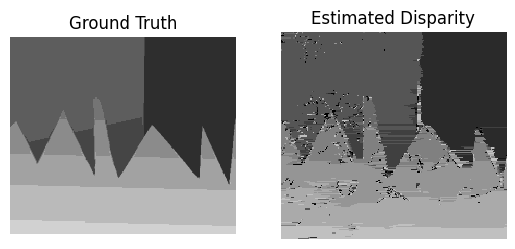

Processing scanline 71


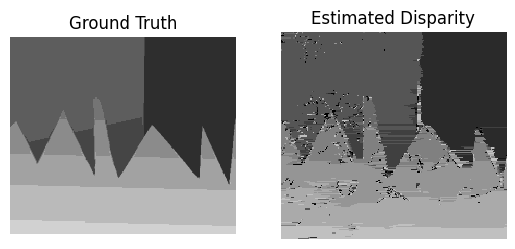

Processing scanline 72


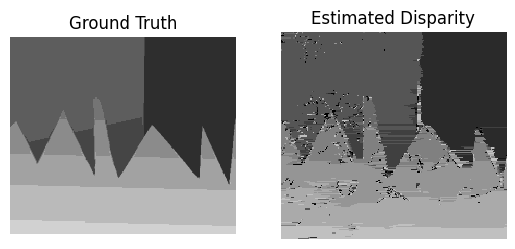

Processing scanline 73


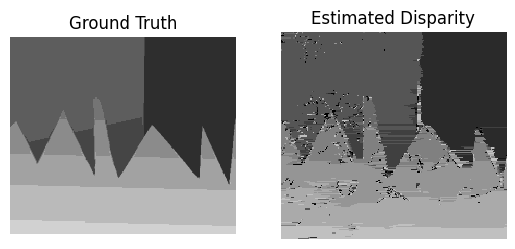

Processing scanline 74


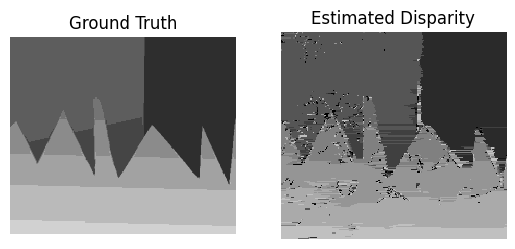

Processing scanline 75


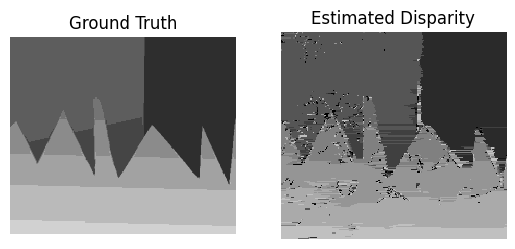

Processing scanline 76


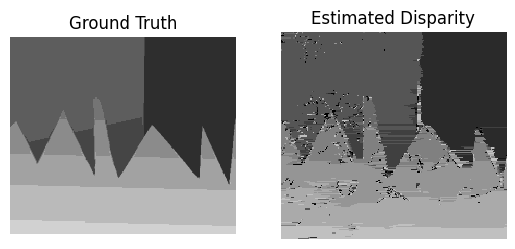

Processing scanline 77


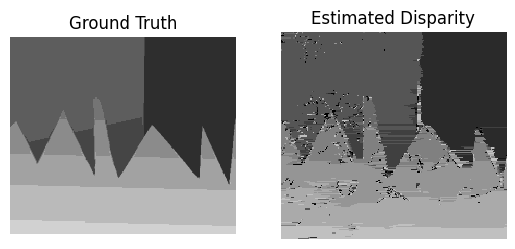

Processing scanline 78


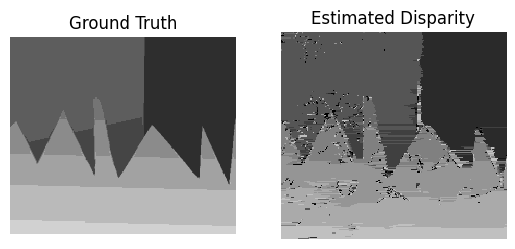

Processing scanline 79


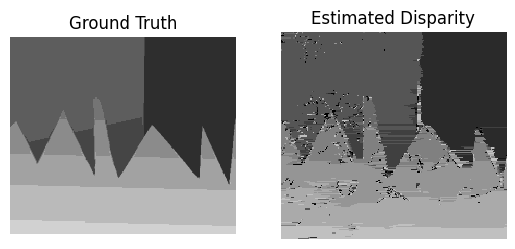

Processing scanline 80


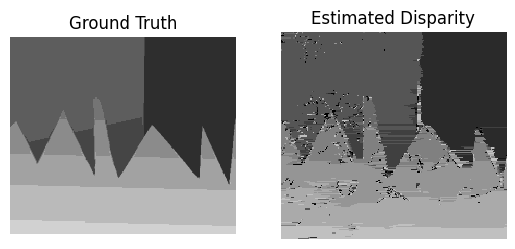

Processing scanline 81


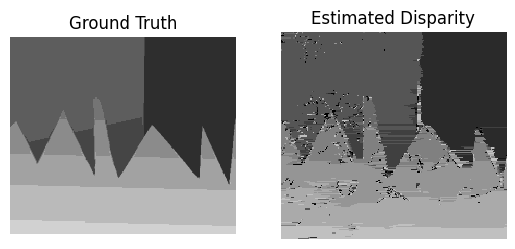

Processing scanline 82


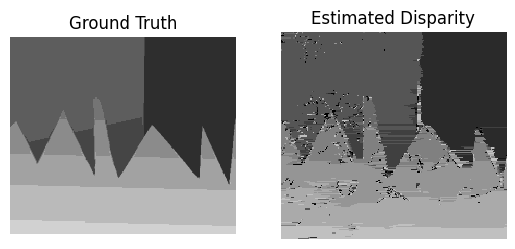

Processing scanline 83


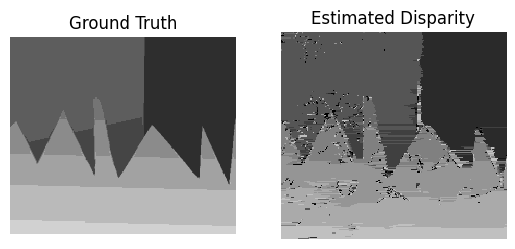

Processing scanline 84


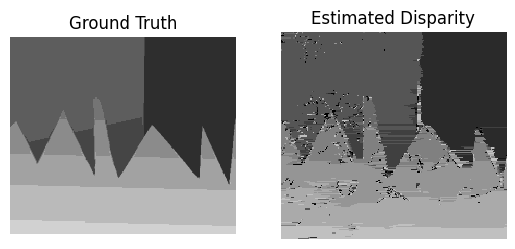

Processing scanline 85


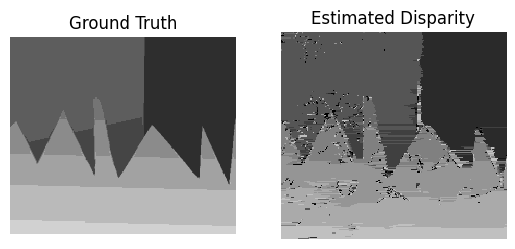

Processing scanline 86


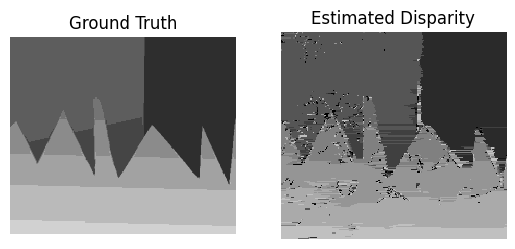

Processing scanline 87


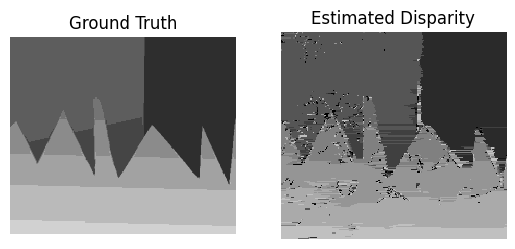

Processing scanline 88


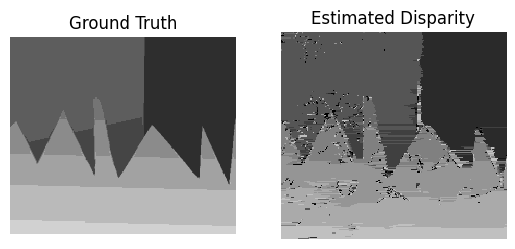

Processing scanline 89


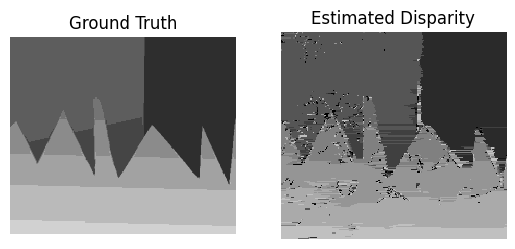

Processing scanline 90


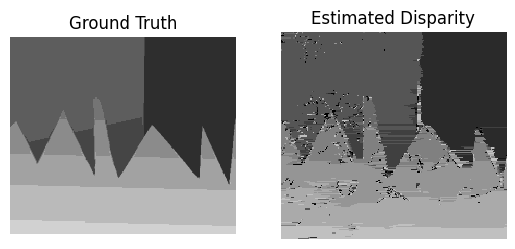

Processing scanline 91


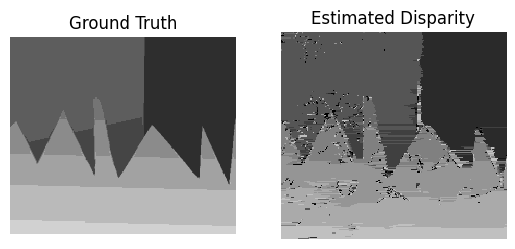

Processing scanline 92


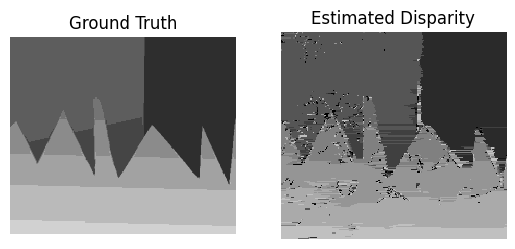

Processing scanline 93


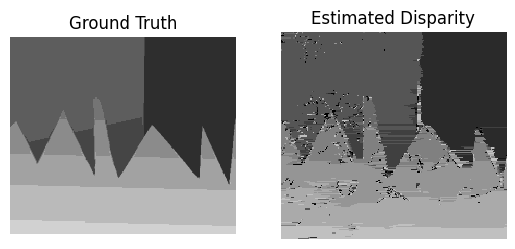

Processing scanline 94


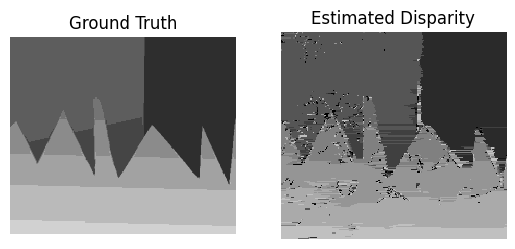

Processing scanline 95


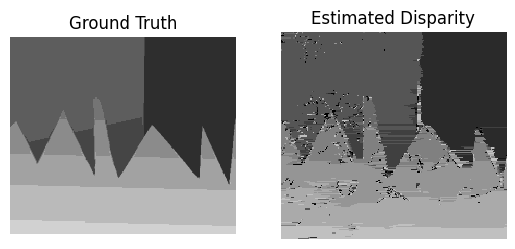

Processing scanline 96


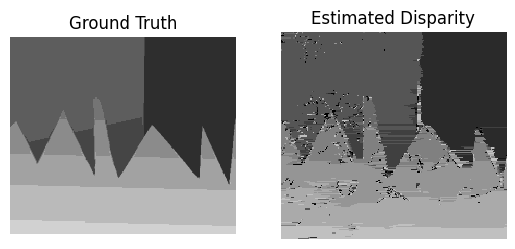

Processing scanline 97


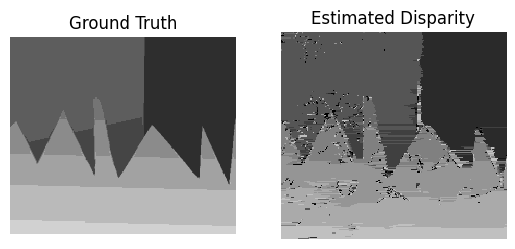

Processing scanline 98


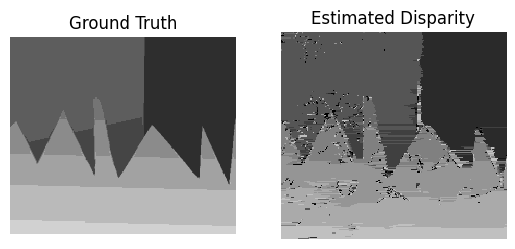

Processing scanline 99


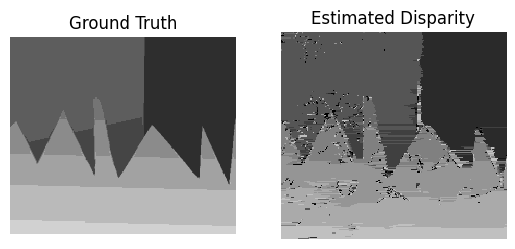

Processing scanline 100


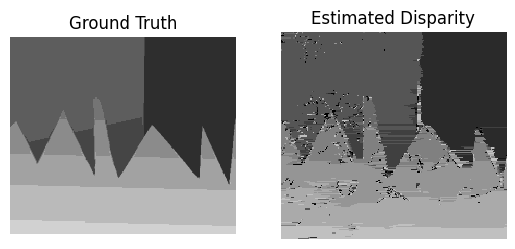

Processing scanline 101


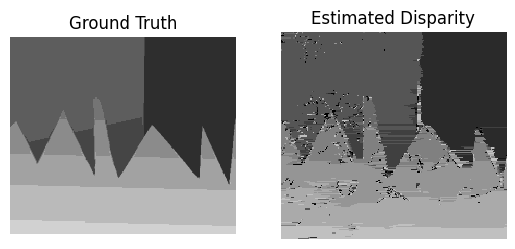

Processing scanline 102


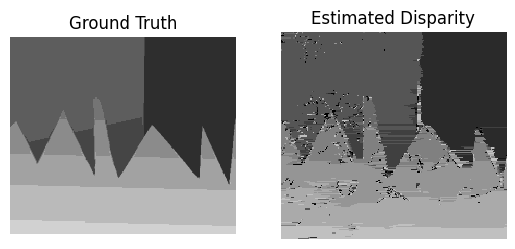

Processing scanline 103


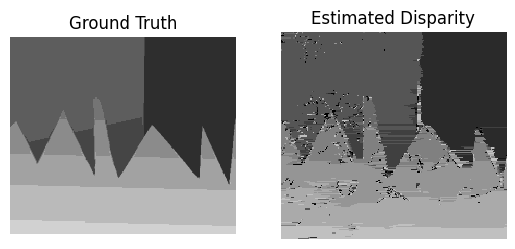

Processing scanline 104


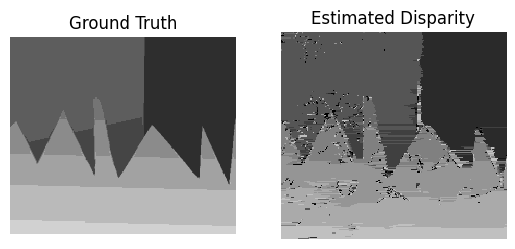

Processing scanline 105


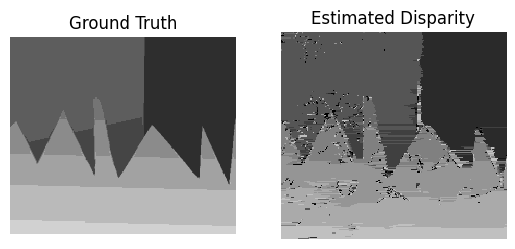

Processing scanline 106


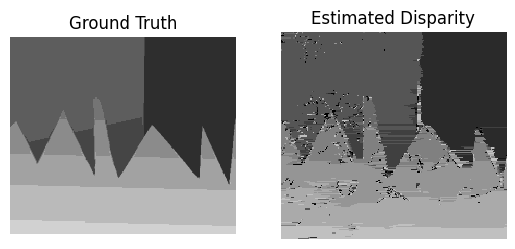

Processing scanline 107


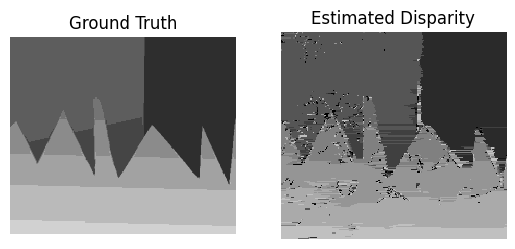

Processing scanline 108


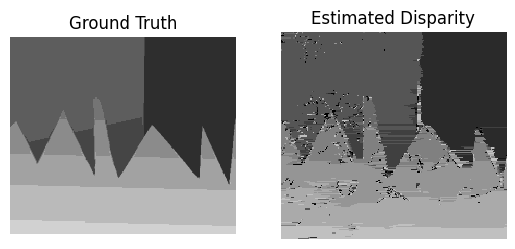

Processing scanline 109


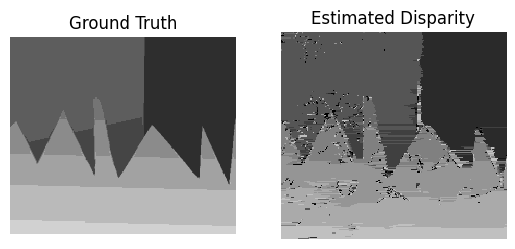

Processing scanline 110


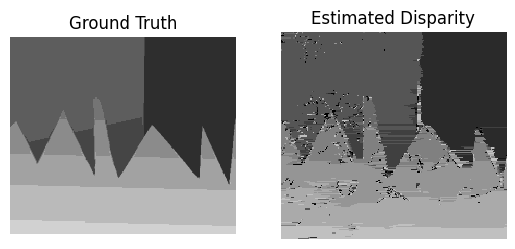

Processing scanline 111


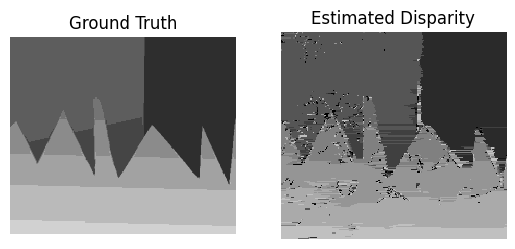

Processing scanline 112


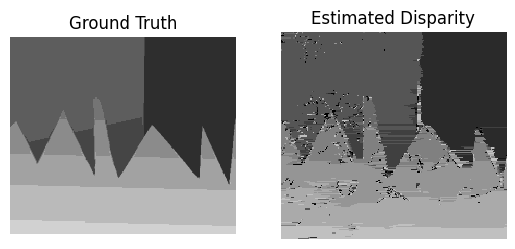

Processing scanline 113


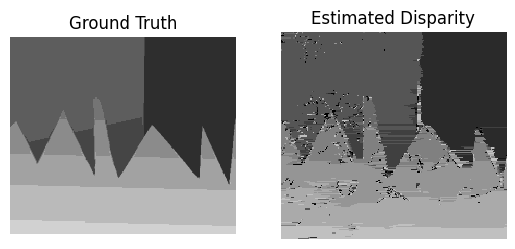

Processing scanline 114


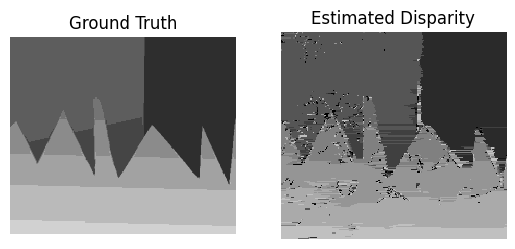

Processing scanline 115


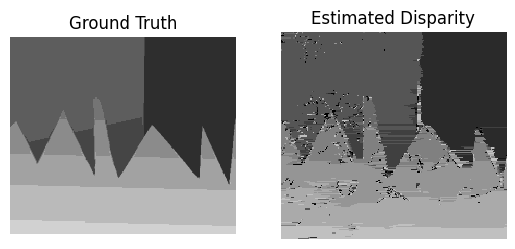

Processing scanline 116


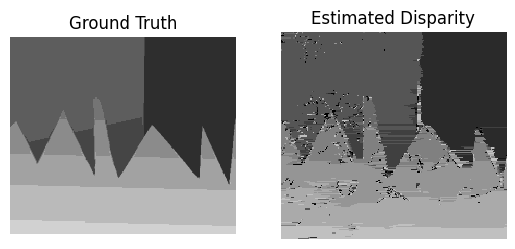

Processing scanline 117


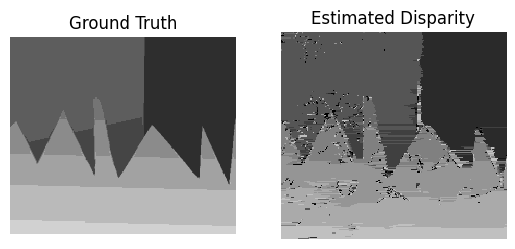

Processing scanline 118


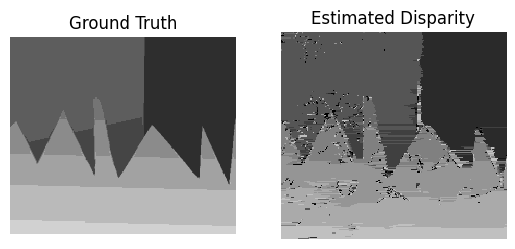

Processing scanline 119


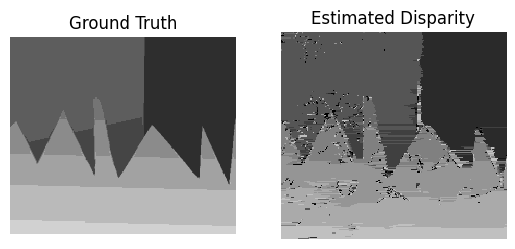

Processing scanline 120


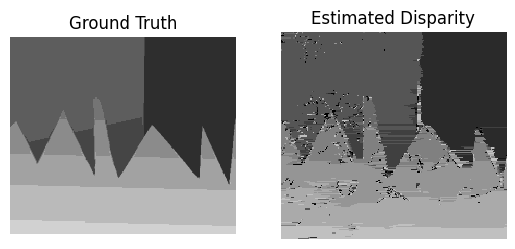

Processing scanline 121


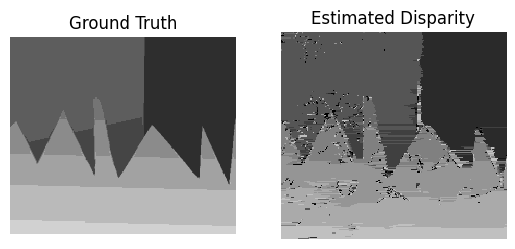

Processing scanline 122


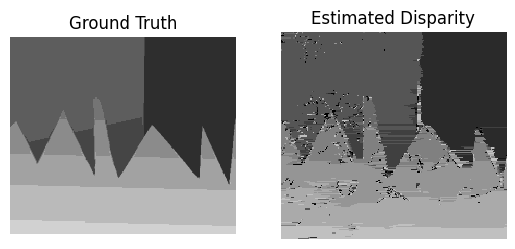

Processing scanline 123


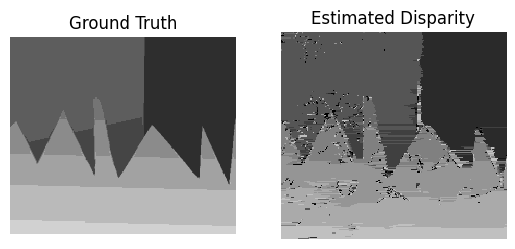

Processing scanline 124


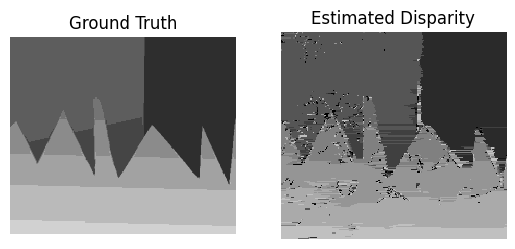

Processing scanline 125


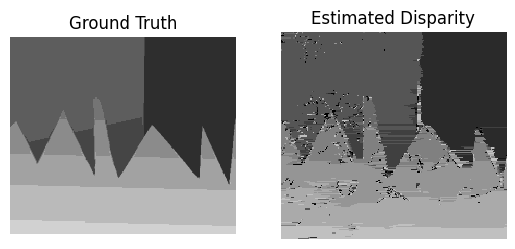

Processing scanline 126


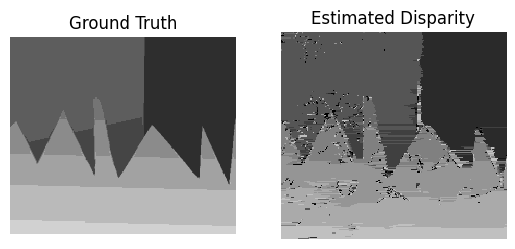

Processing scanline 127


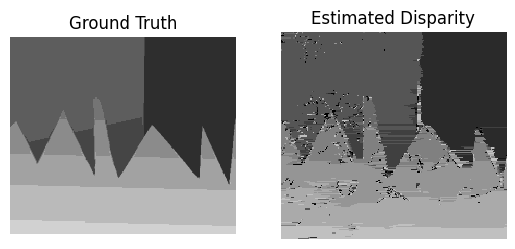

Processing scanline 128


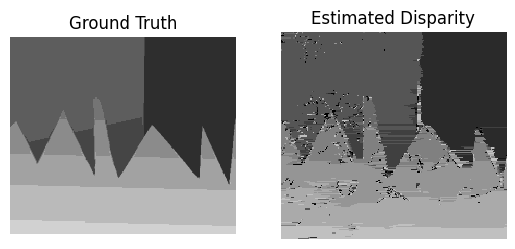

Processing scanline 129


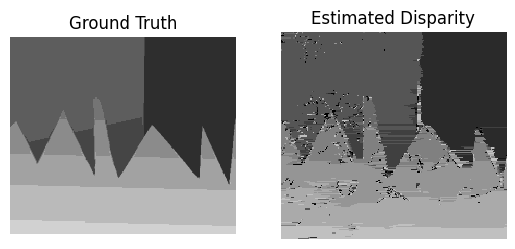

Processing scanline 130


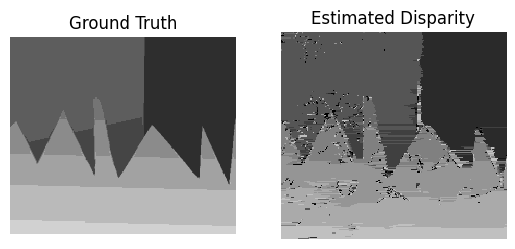

Processing scanline 131


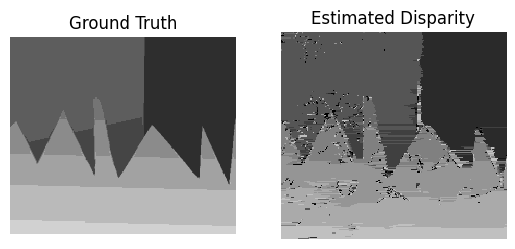

Processing scanline 132


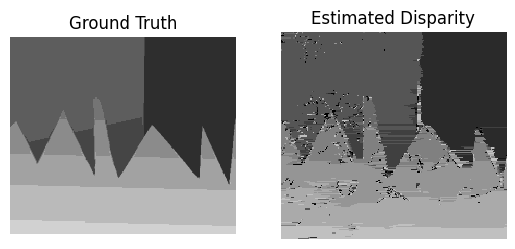

Processing scanline 133


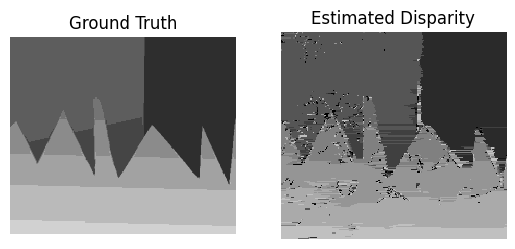

Processing scanline 134


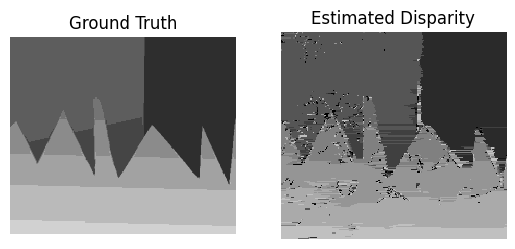

Processing scanline 135


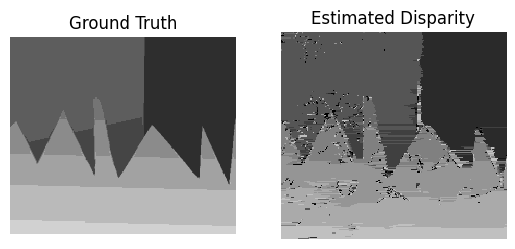

Processing scanline 136


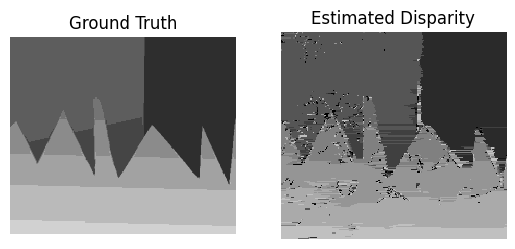

Processing scanline 137


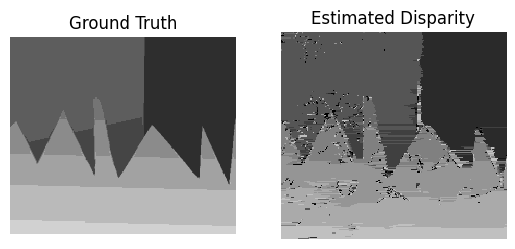

Processing scanline 138


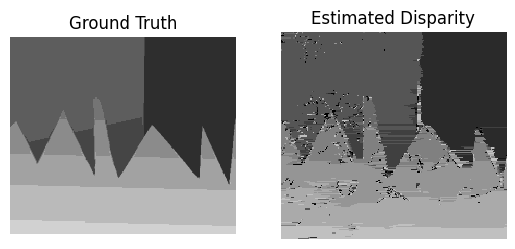

Processing scanline 139


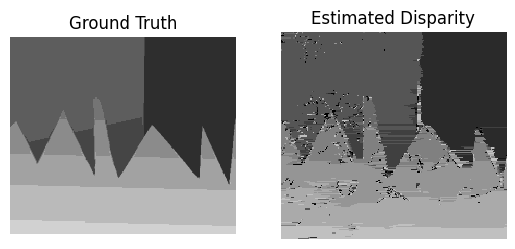

Processing scanline 140


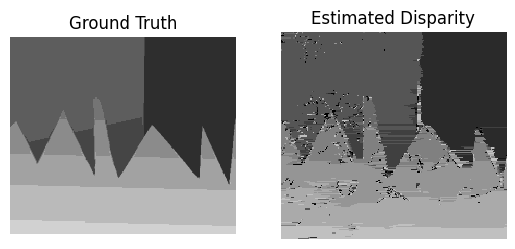

Processing scanline 141


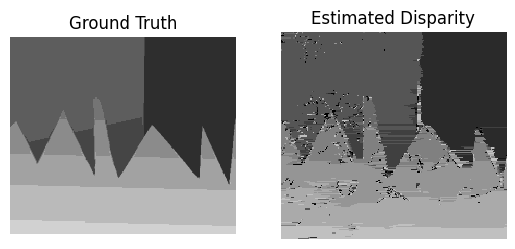

Processing scanline 142


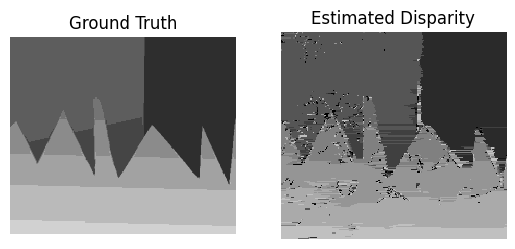

Processing scanline 143


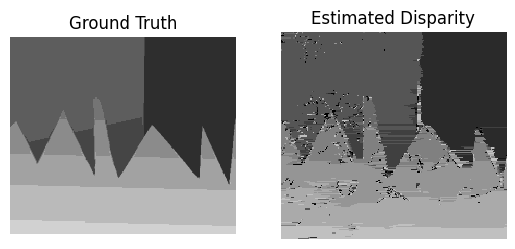

Processing scanline 144


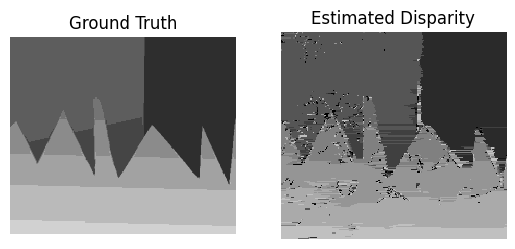

Processing scanline 145


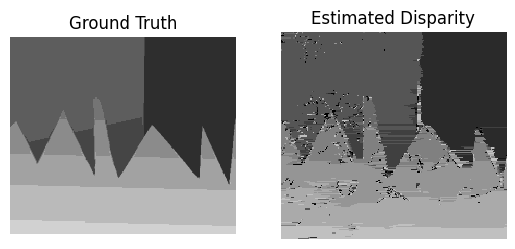

Processing scanline 146


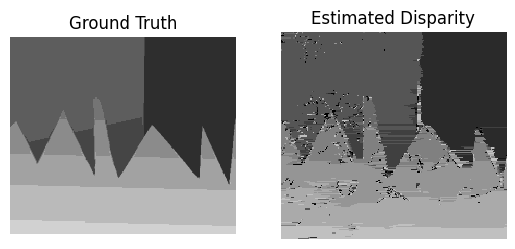

Processing scanline 147


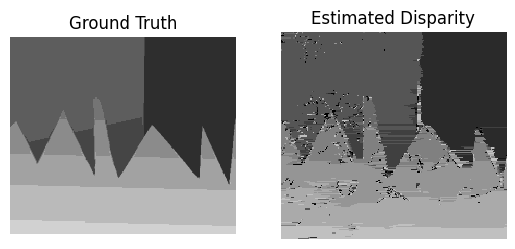

Processing scanline 148


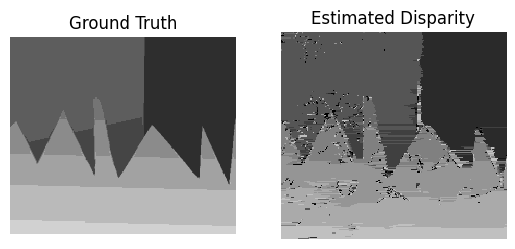

Processing scanline 149


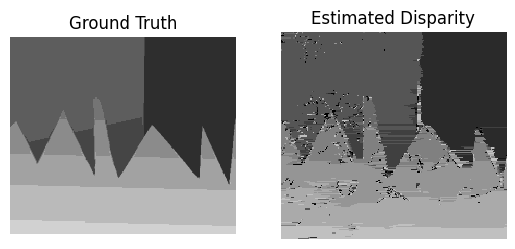

Processing scanline 150


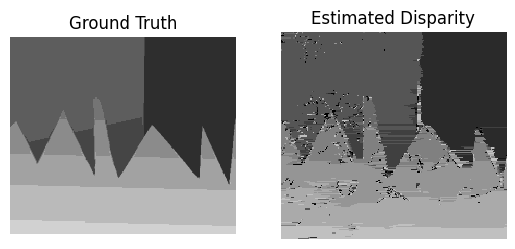

Processing scanline 151


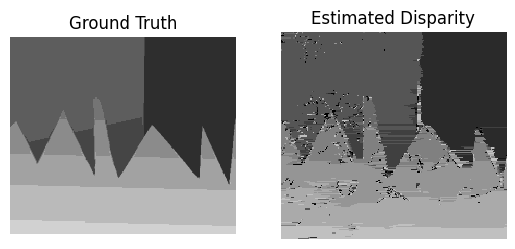

Processing scanline 152


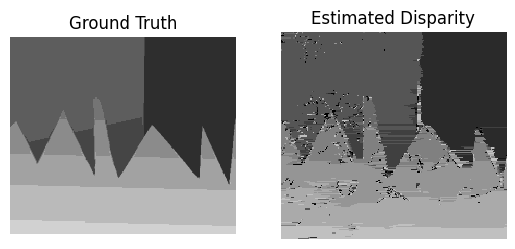

Processing scanline 153


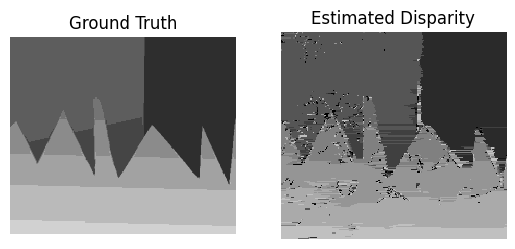

Processing scanline 154


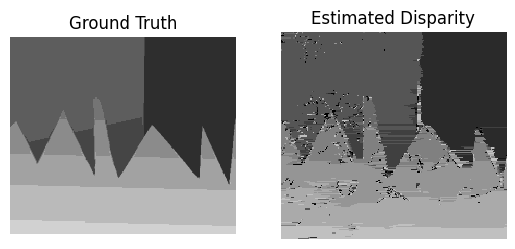

Processing scanline 155


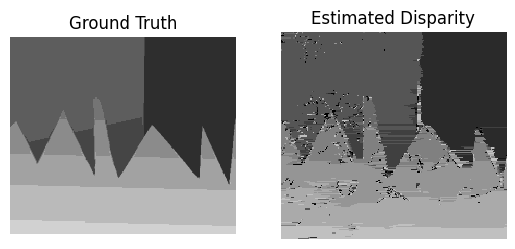

Processing scanline 156


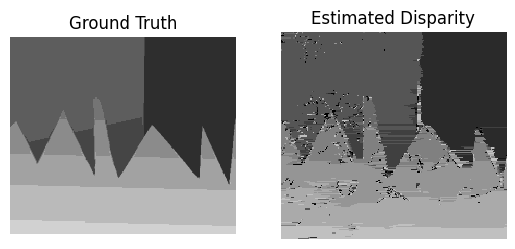

Processing scanline 157


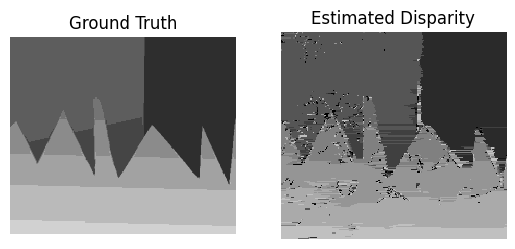

Processing scanline 158


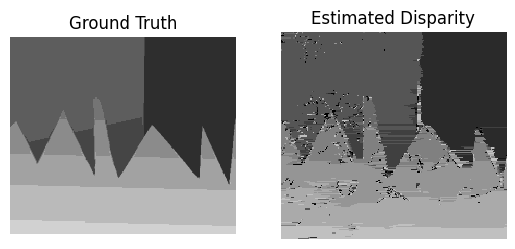

Processing scanline 159


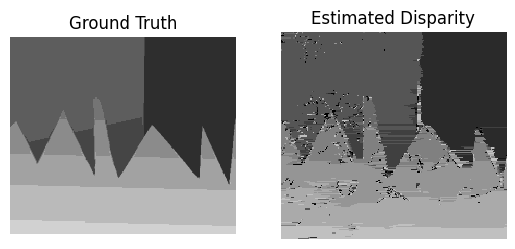

Processing scanline 160


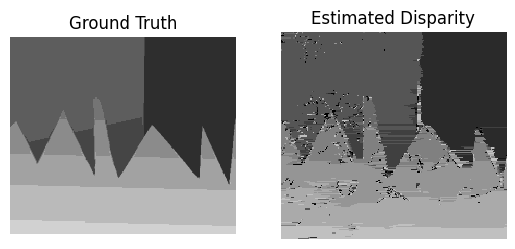

Processing scanline 161


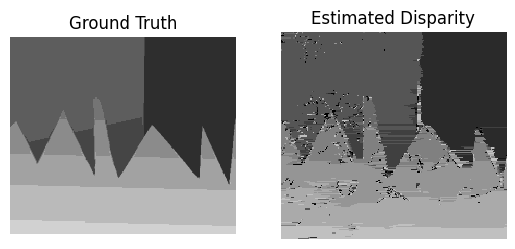

Processing scanline 162


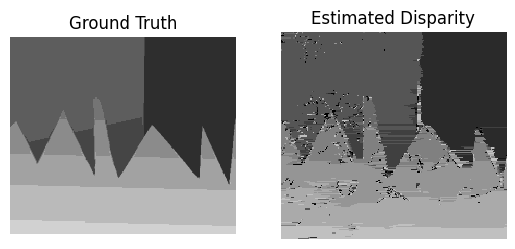

Processing scanline 163


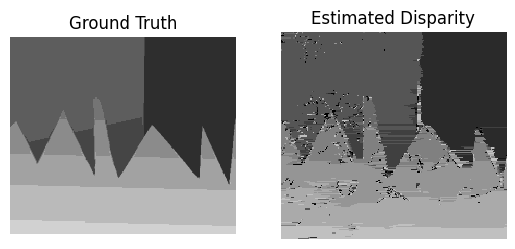

Processing scanline 164


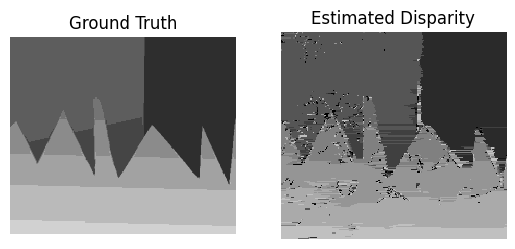

Processing scanline 165


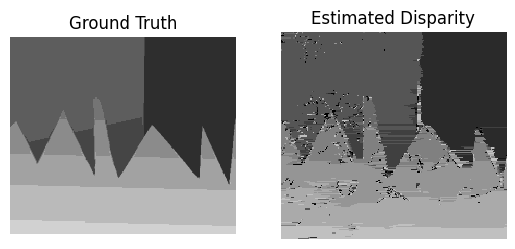

Processing scanline 166


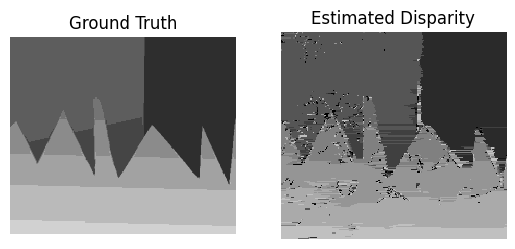

Processing scanline 167


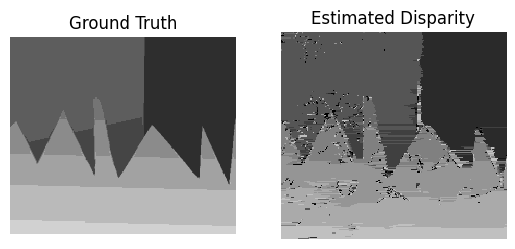

Processing scanline 168


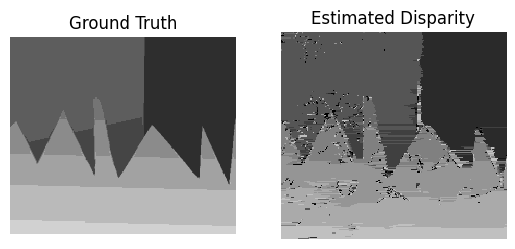

Processing scanline 169


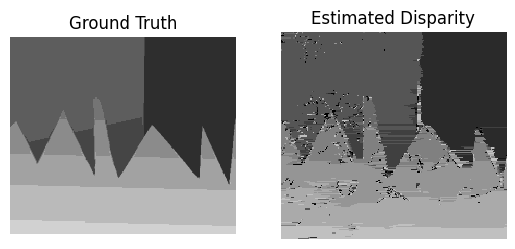

Processing scanline 170


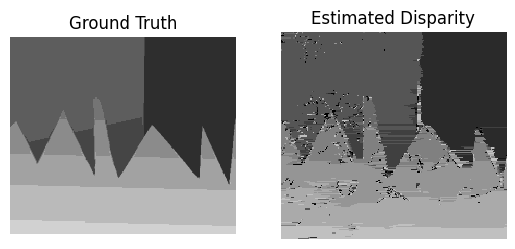

Processing scanline 171


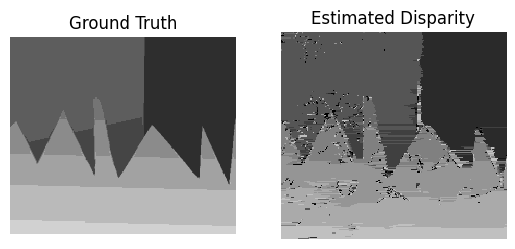

Processing scanline 172


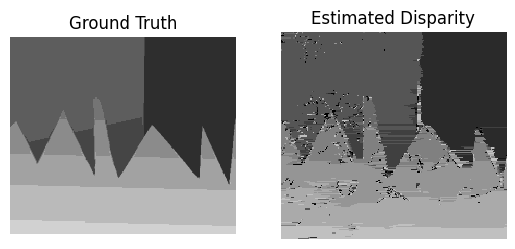

Processing scanline 173


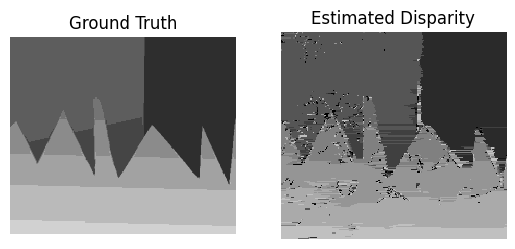

Processing scanline 174


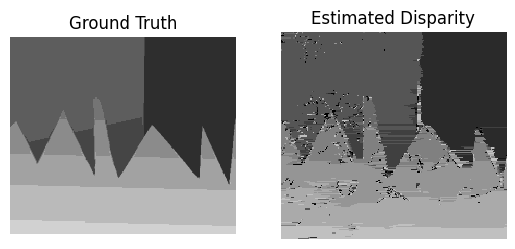

Processing scanline 175


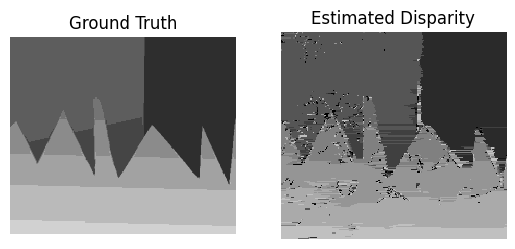

Processing scanline 176


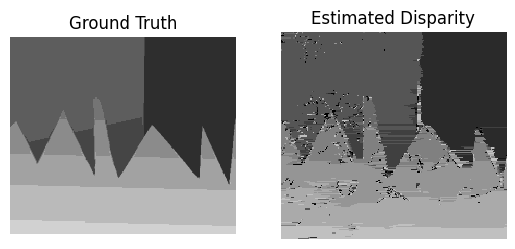

Processing scanline 177


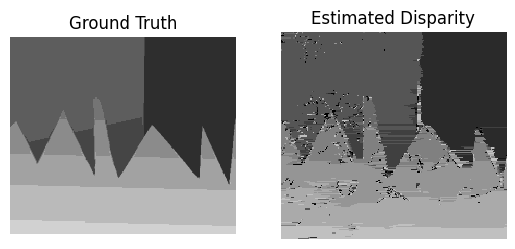

Processing scanline 178


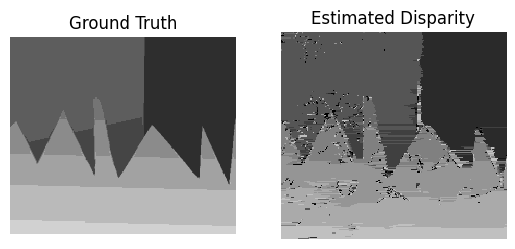

Processing scanline 179


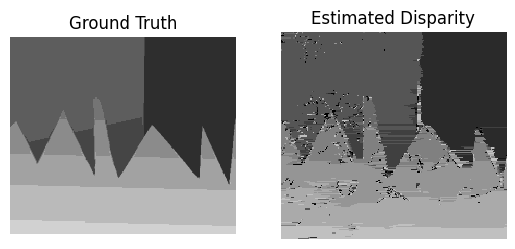

Processing scanline 180


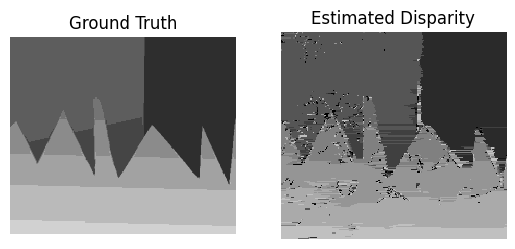

Processing scanline 181


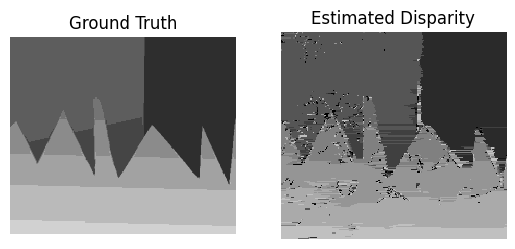

Processing scanline 182


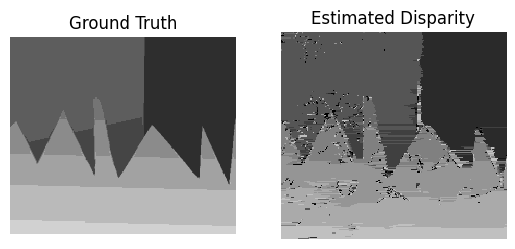

Processing scanline 183


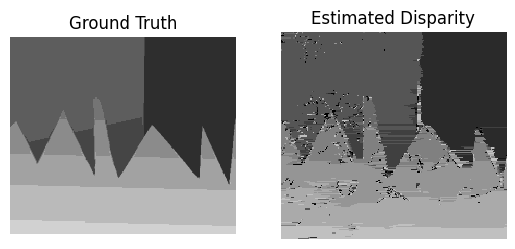

Processing scanline 184


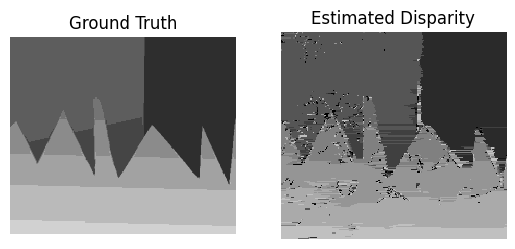

Processing scanline 185


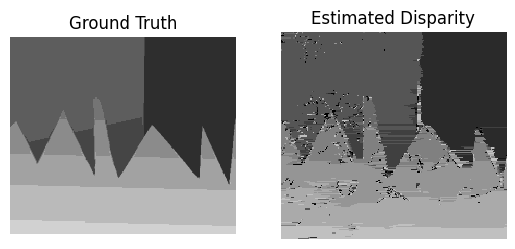

Processing scanline 186


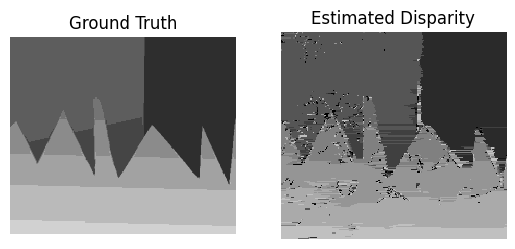

Processing scanline 187


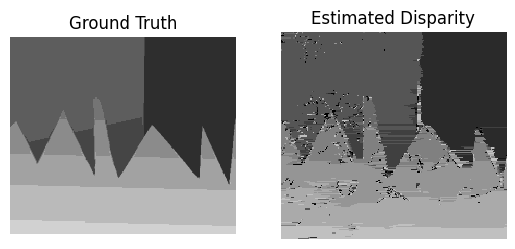

Processing scanline 188


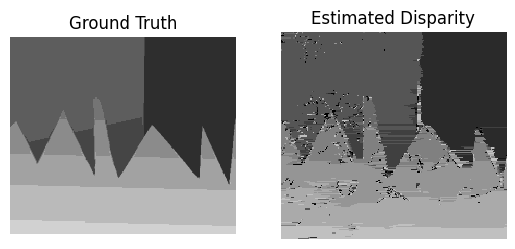

Processing scanline 189


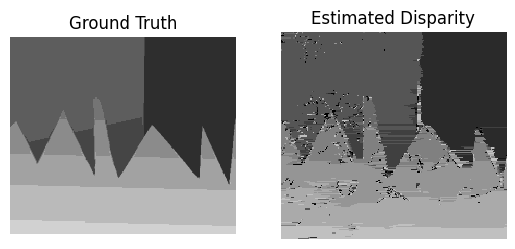

In [15]:
# TODO - investigate how different values of alpha and noiseSD affect the results

# TODO (optional) - rewrite the the "dynamicProgram" in the "dynamicProgramVec" function to make it more efficient. 
# Check the improvements by timining the function calls.

# TODO (optional) - you should be able to rewrite this (calculating unary costs) with fewer loops once you have
#the general idea so that it runs faster. Again you can check the speed improvements by timing them.

# TODO (optional)- adapt the algorithm so that it makes use of colour information

# Run through each line of image
for cY in range(imY):
    print('Processing scanline', cY)
    
    # Define unary costs - we will not use the last few columns of the
    # image as the disparity might map the pixel outside the valid area of
    # the second image
    unaryCosts = np.zeros([maxDisp, imX - maxDisp])
    
    for cDisp in range(maxDisp):
        # Compute the intensity differences for all pixels at once
        intensity_diff = im1[cY, :imX - maxDisp] - im2[cY, cDisp:cDisp + imX - maxDisp]
        cost = (intensity_diff ** 2) / (2 * noiseSD ** 2)
        # Store this cost in the unaryCosts matrix
        unaryCosts[cDisp, :] = cost
    
    # Call the dynamic programming function
    estDisp[cY, :] = dynamicProgramVec(unaryCosts, pairwiseCosts)
    
    # Display solution so far
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gtDisp, vmin=0, vmax=11, cmap='gray', interpolation='nearest', aspect='equal')
    ax1.axis('off')
    ax1.set_title('Ground Truth')
    ax2.imshow(estDisp, vmin=0, vmax=12, cmap='gray', interpolation='nearest', aspect='equal')
    ax2.axis('off')
    ax2.set_title('Estimated Disparity')
    plt.pause(0.01)  # Pause to update the plot
    plt.show()